# 第四部分 Pandas数据分析基础（餐饮小费数据分析)

## 4-1 Pandas数据结构

In [4]:
# 显示所有变量
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
#pandas panel data analisys
import pandas as pd

![](img/4-series结构.png)  

In [42]:
# 引入numpy和pandas
import numpy as np
#pandas panel data analisys
import pandas as pd

# 创建series
# 从数组创建
arr=np.array([11,21,31,41])
arr
ser=pd.Series(arr)
ser
# series索引
ser.index  #该index是rangeIndex
ser.values
#索引操作
ser[0]=111
ser
ser[1:4]
arr[1:4]

array([11, 21, 31, 41])

0    11
1    21
2    31
3    41
dtype: int32

RangeIndex(start=0, stop=4, step=1)

array([11, 21, 31, 41])

0    111
1     21
2     31
3     41
dtype: int32

1    21
2    31
3    41
dtype: int32

array([21, 31, 41])

In [43]:
# 查看series类型
type(ser[1:4])
type(arr[1:4])
type(ser.index)
ser.index

pandas.core.series.Series

numpy.ndarray

pandas.core.indexes.range.RangeIndex

RangeIndex(start=0, stop=4, step=1)

In [4]:
# 其他的创建方式
list=[21.2,4.1,54,6.7]
ser1=pd.Series(list,index=['a','e','c','d'])  #只能一种数据类型
ser1
ser1['e']
ser1[0:3]  #即使改了index依旧可以用原本的索引
type(ser1.index)
# 设置索引
ser1.index
ser1.index=["你好","杰克","哈喽","汤姆"]
ser1.index
ser1.index=["你好","你好","你好","你好"]  #与字典不一样，但是相似，这边index名可以一样
ser1.index
ser1["你好"]  #访问时，index相同则能有多个结果

a    21.2
e     4.1
c    54.0
d     6.7
dtype: float64

4.1

a    21.2
e     4.1
c    54.0
dtype: float64

pandas.core.indexes.base.Index

Index(['a', 'e', 'c', 'd'], dtype='object')

Index(['你好', '杰克', '哈喽', '汤姆'], dtype='object')

Index(['你好', '你好', '你好', '你好'], dtype='object')

你好    21.2
你好     4.1
你好    54.0
你好     6.7
dtype: float64

In [53]:
# series索引和切片
 # 不包含结束的索引位置
 # 包含结束索引名
list=[21.2,4.1,54,6.7]
ser1=pd.Series(list,index=['a','e','c','d'])  #只能一种数据类型
ser1
ser1[2]
ser1[1:3]  #数值是开区间
ser1['e':'c']  #可以用新index进行切片，用非数字型的index是闭区间，因为新index不能-1，即使不是顺序的英文字母也行

a    21.2
e     4.1
c    54.0
d     6.7
dtype: float64

54.0

e     4.1
c    54.0
dtype: float64

e     4.1
c    54.0
dtype: float64

In [ ]:
# 从列表和数组创建Series


![](img/4-Dataframe结构.png)  

In [39]:
# 创建DataFrame--Series的容器，所以先要创建Series
# 从series创建
import pandas as pd
ser1=pd.Series([22,23,45,63,73])
ser2=pd.Series(["M","F","F","F","M"])
ser1;ser2
type(ser1.index)
df=pd.DataFrame([ser1,ser2])
df.T
df.index
df.columns
df.values
type(df)
#修改添加属性
df.index=['age','sex']  #等价于pd.DataFrame([ser1,ser2],['age','sex'])
df

pd.DataFrame([ser1,ser2],index=['age','sex'],columns=['tom','jack','liu','wen','zhu'])

0    22
1    23
2    45
3    63
4    73
dtype: int64

0    M
1    F
2    F
3    F
4    M
dtype: object

pandas.core.indexes.range.RangeIndex

,0,1
0,22,M
1,23,F
2,45,F
3,63,F
4,73,M


RangeIndex(start=0, stop=2, step=1)

RangeIndex(start=0, stop=5, step=1)

array([[22, 23, 45, 63, 73],
       ['M', 'F', 'F', 'F', 'M']], dtype=object)

pandas.core.frame.DataFrame

,0,1,2,3,4
age,22,23,45,63,73
sex,M,F,F,F,M


,tom,jack,liu,wen,zhu
age,NaN,NaN,NaN,NaN,NaN
sex,NaN,NaN,NaN,NaN,NaN


In [24]:
ser1=pd.Series([22,23,45,63,73])
ser2=pd.Series(["M","F","F","F","M"])
df2=pd.DataFrame({"age":ser1,"sex":ser2})
df2
df2.columns

,age,sex
0,22,M
1,23,F
2,45,F
3,63,F
4,73,M


Index(['age', 'sex'], dtype='object')

In [49]:
# 从字典创建
dic = {"Name":["张三","李四","王五","赵六","钱七"],
      "Age":[18,25,30,21,19],
      "Gender":["男","女","女","男","女"]}
df3=pd.DataFrame(dic)
df3

,Name,Age,Gender
0,张三,18,男
1,李四,25,女
2,王五,30,女
3,赵六,21,男
4,钱七,19,女


In [46]:
# 从二维数组创建
import numpy as np
arr=np.arange(16).reshape(4,4)
arr
arr.shape
df4=pd.DataFrame(arr,index=["a","b","c","d"],columns=["c1","c2","c3","c4"])
df4

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

(4, 4)

,c1,c2,c3,c4
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [47]:
# 数据框的属性
df4.index
df4.columns
df4.values
df4.shape
df4.ndim
df4.size  #数据个数

Index(['a', 'b', 'c', 'd'], dtype='object')

Index(['c1', 'c2', 'c3', 'c4'], dtype='object')

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

(4, 4)

2

16

In [62]:
#取列 ，取列用的是指定的方式
df3
# 列的调用方式（中括号和点）
# 每一列是一个Series
df3['Name']
df3.Age
#取多个列,不能[0]，默认是对行进行切片，因为现实axis=0，即横轴
df3[0:3]
df3[['Gender','Age']]

,Name,Age,Gender
0,张三,18,男
1,李四,25,女
2,王五,30,女
3,赵六,21,男
4,钱七,19,女


0    张三
1    李四
2    王五
3    赵六
4    钱七
Name: Name, dtype: object

0    18
1    25
2    30
3    21
4    19
Name: Age, dtype: int64

,Name,Age,Gender
0,张三,18,男
1,李四,25,女
2,王五,30,女


,Gender,Age
0,男,18
1,女,25
2,女,30
3,男,21
4,女,19


In [66]:
#取行,取行用的是切片的方式
dic = {"Name":["张三","李四","王五","赵六","钱七"],
      "Age":[18,25,30,21,19],
      "Gender":["男","女","女","男","女"]}
df3=pd.DataFrame(dic)
df3[0:3]
df3.index=['a','b','c','d','e']
df3
df3['a':'d']
# df3[['a','b','c']] #取列的操作
df3[0:2]

,Name,Age,Gender
0,张三,18,男
1,李四,25,女
2,王五,30,女


,Name,Age,Gender
a,张三,18,男
b,李四,25,女
c,王五,30,女
d,赵六,21,男
e,钱七,19,女


,Name,Age,Gender
a,张三,18,男
b,李四,25,女
c,王五,30,女
d,赵六,21,男


,Name,Age,Gender
a,张三,18,男
b,李四,25,女


## 项目步骤：读取餐饮小费数据创建DataFrame

In [72]:
# 从文本文件创建
import pandas as pd

# 两种方法读取csv文件
#read_table，会把第一行作为columns
df1=pd.read_table("./data/scores.txt")  #read_xx有很多的方法读文件的，自选，还有json
df1.head(3)  #默认返回前5行
type(df1)

#csv也可以用read_table，需要指定sep分隔符
df2=pd.read_table("data/scores.csv",sep=",",encoding='gbk')
df2.head(1)

#read_csv
df3=pd.read_csv("data/scores.csv",encoding='gbk')
df3.head(1)

# read_excel
df4=pd.read_excel("data/users.xlsx",sheet_name="users2")
df4.head(1)
df2["num"] #error

,num,class,chn,math,eng,phy,chem,politics,bio,history,geo,pe
0,158,3,99.0,120,114.0,70.0,49.5,50.0,49.0,48.5,49.5,60
1,442,7,107.0,120,118.5,68.6,43.0,49.0,48.5,48.5,49.0,56
2,249,4,98.0,120,116.0,70.0,47.5,47.0,49.0,47.5,49.0,60


pandas.core.frame.DataFrame

,num,class,chn,math,eng,phy,chem,politics,bio,history,geo,pe,total,gender
0,158,3,99.0,120,114.0,70.0,49.5,50.0,49.0,48.5,49.5,60,709.5,女


,num,class,chn,math,eng,phy,chem,politics,bio,history,geo,pe,total,gender
0,158,3,99.0,120,114.0,70.0,49.5,50.0,49.0,48.5,49.5,60,709.5,女


,1,admin,超级管理员,admin.1,130,根目录
0,981,NaN,老师,teacher,328,统计班


0      158
1      442
2      249
3      573
4      310
      ... 
594    509
595    244
596    335
597    131
598     25
Name: num, Length: 599, dtype: int64

In [74]:
#读取文件同时设置某一列作为index（非常重要）
df5=pd.read_csv("data/scores.csv",encoding='gbk',index_col="num")#设置某一个column作为index
df5.head()
df5.index

,class,chn,math,eng,phy,chem,politics,bio,history,geo,pe,total,gender
num,,,,,,,,,,,,,
158,3,99.0,120,114.0,70.0,49.50,50.0,49.0,48.5,49.5,60,709.50,女
442,7,107.0,120,118.5,68.6,43.00,49.0,48.5,48.5,49.0,56,708.10,男
249,4,98.0,120,116.0,70.0,47.50,47.0,49.0,47.5,49.0,60,704.00,男
573,9,102.0,113,111.5,70.0,47.00,49.0,49.0,49.0,49.5,60,700.00,女
310,5,103.0,120,111.5,70.0,44.75,46.5,48.0,48.0,48.0,60,699.75,女


Index([158, 442, 249, 573, 310, 613, 502, 115, 298, 531,
       ...
       339, 395,  45, 388, 288, 509, 244, 335, 131,  25],
      dtype='int64', name='num', length=599)

In [75]:
#读取tips数据集
df=pd.read_csv("data/tips.csv",encoding='gbk')
df.head()
df.shape

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


(244, 7)

In [82]:
# DataFrame的每一列就是一个Series
# 取tip列
df['tip']  #等价于df.tip
type(df['tip'])
df['tip'][:5]  #先取列的Series后切片（减小范围）
df.columns
df.tip  #和df['tip']两种方式两个都可以，通过属性或者访问的方式

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

pandas.core.series.Series

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

0       No
1       No
2       No
3       No
4       No
      ... 
239     No
240    Yes
241    Yes
242     No
243     No
Name: smoker, Length: 244, dtype: object

In [86]:
# 取多列
df[['total_bill','sex']].tail()[:3]

,total_bill,sex
239,29.03,Male
240,27.18,Female
241,22.67,Male


In [104]:
# 取某一门课（列 chn）的某一个人（num为573）
# 读取学生成绩数据
student=pd.read_table("data/scores.txt",encoding='gbk',index_col="num")
student.head()
# student['chn'].sort_index()[573]
student['chn'][573]  #变成了Series，那就能直接用数字取了，就不用sort了

,class,chn,math,eng,phy,chem,politics,bio,history,geo,pe
num,,,,,,,,,,,
158,3,99.0,120,114.0,70.0,49.50,50.0,49.0,48.5,49.5,60
442,7,107.0,120,118.5,68.6,43.00,49.0,48.5,48.5,49.0,56
249,4,98.0,120,116.0,70.0,47.50,47.0,49.0,47.5,49.0,60
573,9,102.0,113,111.5,70.0,47.00,49.0,49.0,49.0,49.5,60
310,5,103.0,120,111.5,70.0,44.75,46.5,48.0,48.0,48.0,60


102.0

In [108]:
#按行迭代
df.head()
for index,row in df.iterrows():
    print(index,end="：")
    print(row['tip'])
    pd.DataFrame()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


0：1.01
1：1.66
2：3.5
3：3.31
4：3.61
5：4.71
6：2.0
7：3.12
8：1.96
9：3.23
10：1.71
11：5.0
12：1.57
13：3.0
14：3.02
15：3.92
16：1.67
17：3.71
18：3.5
19：3.35
20：4.08
21：2.75
22：2.23
23：7.58
24：3.18
25：2.34
26：2.0
27：2.0
28：4.3
29：3.0
30：1.45
31：2.5
32：3.0
33：2.45
34：3.27
35：3.6
36：2.0
37：3.07
38：2.31
39：5.0
40：2.24
41：2.54
42：3.06
43：1.32
44：5.6
45：3.0
46：5.0
47：6.0
48：2.05
49：3.0
50：2.5
51：2.6
52：5.2
53：1.56
54：4.34
55：3.51
56：3.0
57：1.5
58：1.76
59：6.73
60：3.21
61：2.0
62：1.98
63：3.76
64：2.64
65：3.15
66：2.47
67：1.0
68：2.01
69：2.09
70：1.97
71：3.0
72：3.14
73：5.0
74：2.2
75：1.25
76：3.08
77：4.0
78：3.0
79：2.71
80：3.0
81：3.4
82：1.83
83：5.0
84：2.03
85：5.17
86：2.0
87：4.0
88：5.85
89：3.0
90：3.0
91：3.5
92：1.0
93：4.3
94：3.25
95：4.73
96：4.0
97：1.5
98：3.0
99：1.5
100：2.5
101：3.0
102：2.5
103：3.48
104：4.08
105：1.64
106：4.06
107：4.29
108：3.76
109：4.0
110：3.0
111：1.0
112：4.0
113：2.55
114：4.0
115：3.5
116：5.07
117：1.5
118：1.8
119：2.92
120：2.31
121：1.68
122：2.5
123：2.0
124：2.52
125：4.2
126：1.48
127：2.0
128：2.0
129：2.18
1

## 4-2 DataFrame的数据查看

![](img/4-Dataframe常用方法.png) 

In [32]:
# 创建DataFrame
import pandas as pd
df = pd.DataFrame({"Name":["张三","李四","王五","赵六","钱七"],
                   "Age":[18,25,30,21,19],
                   "Sex":["男","女","女","男","女"]})
df

,Name,Age,Sex
0,张三,18,男
1,李四,25,女
2,王五,30,女
3,赵六,21,男
4,钱七,19,女


In [33]:
# 数据框的常用属性
# 索引
df.index
df.index[3]
# 所有值，相当于二维数组
df.values
df.values[4]
# 列名
df.columns
# 数据类型
df.dtypes

RangeIndex(start=0, stop=5, step=1)

3

array([['张三', 18, '男'],
       ['李四', 25, '女'],
       ['王五', 30, '女'],
       ['赵六', 21, '男'],
       ['钱七', 19, '女']], dtype=object)

array(['钱七', 19, '女'], dtype=object)

Index(['Name', 'Age', 'Sex'], dtype='object')

Name    object
Age      int64
Sex     object
dtype: object

In [34]:
## 查看DataFrame的元素个数
df.size
## 查看DataFrame的维度数
df.ndim
## 查看DataFrame的形状
df.shape
## 查看DataFrame的行数
len(df)
#或者
df.shape[0]

15

2

(5, 3)

5

5

In [35]:
df
#通过没有的列进行增加列，有列的则是修改操作
df["Fname"]=["zhang","li","wang",'zhao','qian']
df

,Name,Age,Sex
0,张三,18,男
1,李四,25,女
2,王五,30,女
3,赵六,21,男
4,钱七,19,女


,Name,Age,Sex,Fname
0,张三,18,男,zhang
1,李四,25,女,li
2,王五,30,女,wang
3,赵六,21,男,zhao
4,钱七,19,女,qian


In [36]:
# set_index，第一个参数可以是复数
df.set_index('Fname',inplace=True)
# 将某一列设为行索引
df

,Name,Age,Sex
Fname,,,
zhang,张三,18,男
li,李四,25,女
wang,王五,30,女
zhao,赵六,21,男
qian,钱七,19,女


In [37]:
df.index

Index(['zhang', 'li', 'wang', 'zhao', 'qian'], dtype='object', name='Fname')

In [38]:
# 设置行索引
df = pd.DataFrame({"Name":["张三","李四","王五","赵六","钱七"],
                   "Age":[18,25,30,21,19],
                   "Sex":["男","女","女","男","女"]})
df.index=['zhang', 'li', 'wang', 'zhao', 'qian']
df

,Name,Age,Sex
zhang,张三,18,男
li,李四,25,女
wang,王五,30,女
zhao,赵六,21,男
qian,钱七,19,女


In [40]:
df1=df.set_index(["Name","Age"],drop=False)
df1
df1.index

,,Name,Age,Sex
Name,Age,,,
张三,18,张三,18,男
李四,25,李四,25,女
王五,30,王五,30,女
赵六,21,赵六,21,男
钱七,19,钱七,19,女


MultiIndex([('张三', 18),
            ('李四', 25),
            ('王五', 30),
            ('赵六', 21),
            ('钱七', 19)],
           names=['Name', 'Age'])

In [52]:
df

##取列
#用字典的方式，结果就是Series
df['Name']
df.Age  #属性的方式

##取行
#切片方式取的就是dataframe，相当于子df
df['zhang':'zhang']
type(df['zhang':'zhang'])
# 索引名称，返回series
df.loc['zhang']
type(df.loc['zhang'])
#索引位置，类似series的方式用，取值，返回series
df.iloc[2]
type(df.iloc[2])

,Name,Age,Sex
zhang,张三,18,男
li,李四,25,女
wang,王五,30,女
zhao,赵六,21,男
qian,钱七,19,女


zhang    张三
li       李四
wang     王五
zhao     赵六
qian     钱七
Name: Name, dtype: object

zhang    18
li       25
wang     30
zhao     21
qian     19
Name: Age, dtype: int64

,Name,Age,Sex
zhang,张三,18,男


pandas.core.frame.DataFrame

Name    张三
Age     18
Sex      男
Name: zhang, dtype: object

pandas.core.series.Series

Name    王五
Age     30
Sex      女
Name: wang, dtype: object

pandas.core.series.Series

In [ ]:
# 属性方式, 不推荐


In [54]:
# 访问某一列的几行
df
 # 闭区间
df["Name"]["li":"zhao"]
 # 开区间
df["Name"][1:4]
df["Name"][4]   #series才可以

,Name,Age,Sex
zhang,张三,18,男
li,李四,25,女
wang,王五,30,女
zhao,赵六,21,男
qian,钱七,19,女


li      李四
wang    王五
zhao    赵六
Name: Name, dtype: object

li      李四
wang    王五
zhao    赵六
Name: Name, dtype: object

'钱七'

In [51]:
# 访问多列数据，多列数据的多行
df[["Name","Age"]]
df[["Name","Age"]]["li":"zhao"]  #闭区间
df[["Name","Age"]][1:4]  #半开半闭
# df[["Name","Age"]][1]  #dataframe就不能这样了，必须要切片

,Name,Age
zhang,张三,18
li,李四,25
wang,王五,30
zhao,赵六,21
qian,钱七,19


,Name,Age
li,李四,25
wang,王五,30
zhao,赵六,21


,Name,Age
li,李四,25
wang,王五,30
zhao,赵六,21


In [56]:
#取一列：以DataFrame的形式
df
df[["Name"]]
type(df[["Name"]])

,Name,Age,Sex
zhang,张三,18,男
li,李四,25,女
wang,王五,30,女
zhao,赵六,21,男
qian,钱七,19,女


,Name
zhang,张三
li,李四
wang,王五
zhao,赵六
qian,钱七


pandas.core.frame.DataFrame

In [63]:
#排名
df["Age"]
df["Age"].rank()
#排序，索引排序
df["Age"].sort_index()
#值排序
df["Age"].sort_values()

zhang    18
li       25
wang     30
zhao     21
qian     19
Name: Age, dtype: int64

zhang    1.0
li       4.0
wang     5.0
zhao     3.0
qian     2.0
Name: Age, dtype: float64

li       25
qian     19
wang     30
zhang    18
zhao     21
Name: Age, dtype: int64

zhang    18
qian     19
zhao     21
li       25
wang     30
Name: Age, dtype: int64

- loc属性是针对DataFrame索引名称的切片方法，**如果传入的不是索引名称，那么切片操作将无法执行**。利用lo属性，能够实现所有单层索引切片操作。loc属性的使用方法如下。  
     **DataFrame.loc[行索引名称或条件, 列索引名称]**

- iloc和loc区别是iloc接收的必须是行索引和列索引的位置。iloc属性的使用方法如下。  
    **DataFrame.iloc[行索引位置, 列索引位置]**

In [78]:
# loc方法索引和切片, 推荐的方式，也可以实现多行多列
df
#先行后列，类似ndarray里
df.loc["zhao","Age"]
df.iloc[3,1]

,Name,Age,Sex
zhang,张三,18,男
li,李四,25,女
wang,王五,30,女
zhao,赵六,21,男
qian,钱七,19,女


21

21

In [76]:
# loc方式索引，也可以实现多行多列
df.loc[['zhao','qian'],'Age']
df.loc[['zhao','zhang'],['Age','Sex']]

zhao    21
qian    19
Name: Age, dtype: int64

,Age,Sex
zhao,21,男
zhang,18,男


In [75]:
# 行列均切片，注意包含结束，闭区间
df.loc['zhang':'zhao','Name':"Sex"]

,Name,Age,Sex
zhang,张三,18,男
li,李四,25,女
wang,王五,30,女
zhao,赵六,21,男


In [82]:
# iloc方式索引，i就是index
df
df.iloc[3,2]

,Name,Age,Sex
zhang,张三,18,男
li,李四,25,女
wang,王五,30,女
zhao,赵六,21,男
qian,钱七,19,女


'男'

In [87]:
# iloc方式切片
# 开区间
df.iloc[1:3,0:1]
#混合的方式
df.iloc[:,[0,2]]
df.iloc[[1,4],[2,0]]

,Name
li,李四
wang,王五


,Name,Sex
zhang,张三,男
li,李四,女
wang,王五,女
zhao,赵六,男
qian,钱七,女


,Sex,Name
li,女,李四
qian,女,钱七


In [96]:
# 条件切片, 要用条件只能用loc，不用iloc
# 年龄小于20的姓名
df
df.loc[df["Age"]<20,:]  #只有行有条件，列没有
df.loc[df["Age"]<20,["Name","Age"]]
df.loc[df["Age"]<20,:][["Name","Age"]]  #等价于上式

# df.iloc[df[1]<20,:]  #因为iloc不支持，所以会报错
#如果一定要用iloc的方式
df.iloc[(df["Age"]<20).values,]

,Name,Age,Sex
zhang,张三,18,男
li,李四,25,女
wang,王五,30,女
zhao,赵六,21,男
qian,钱七,19,女


,Name,Age,Sex
zhang,张三,18,男
qian,钱七,19,女


,Name,Age
zhang,张三,18
qian,钱七,19


,Name,Age
zhang,张三,18
qian,钱七,19


,Name,Age,Sex
zhang,张三,18,男
qian,钱七,19,女


In [93]:
# # 条件切片，age<20的所有人
df["Age"]<20  #返回一个布尔型的series

zhang     True
li       False
wang     False
zhao     False
qian      True
Name: Age, dtype: bool

## 项目步骤：小费数据的查看和选取

In [1]:
# 显示所有变量
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# 小费数据集的数据选取
import numpy as np
import pandas as pd
tips=pd.read_csv("data/tips.csv")
tips.shape
tips.info()
tips.describe()

(244, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [3]:
# tips
# 选取小费列
tips["tip"].head()  #等价于下面
tips.loc[:,"tip"].head()
tips.loc[:,"tip"][:5]  #等价于上面
# 属性方式选取
tips.tip.head(5)
# 多列
tips.iloc[:5,:2]

#多列多行 tip>8
tips[['tip','total_bill']].head()
tips.loc[tips['tip']>8,['tip','total_bill']]

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


,tip,total_bill
0,1.01,16.99
1,1.66,10.34
2,3.50,21.01
3,3.31,23.68
4,3.61,24.59


,tip,total_bill
170,10.0,50.81
212,9.0,48.33


In [4]:
# 取出前两列的前5行数据
# loc方式
 # 闭区间
tips.loc[:4,['total_bill','tip']]
# iloc方式
 # 开区间
tips.iloc[:5,:2]

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [5]:
# 取出所有性别为male的行(知识点：条件选取切片)
tips.loc[tips["sex"]=="Male",:]
tips.iloc[(tips["sex"]=="Male").values,:]

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2


,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [6]:
# 保存数据框的操作

# 带索引或不带索引，index表示是否保存，false的话DataFrame的index就会去掉，直接保存values和columns
tips.to_csv("data/tips_to_csv.csv",index=True)
tips.to_csv("data/tips_to_csv1.csv",index=False)

### 补充：教材上的点餐数据

In [16]:
# 读取数据
detail=pd.read_excel("data/meal_order_detail.xlsx",sheet_name=0,index_col="detail_id")
detail.head()
detail.shape

,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id
detail_id,,,,,,,,,,,,,,,,,,
2956,417,610062,NaN,NaN,蒜蓉生蚝,0,1,49,NaN,2016-08-01 11:05:36,NaN,NaN,NaN,0,NaN,NaN,caipu/104001.jpg,1442
2958,417,609957,NaN,NaN,蒙古烤羊腿_x000D_\n_x000D_\n_x000D_\n,0,1,48,NaN,2016-08-01 11:07:07,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1442
2961,417,609950,NaN,NaN,大蒜苋菜,0,1,30,NaN,2016-08-01 11:07:40,NaN,NaN,NaN,0,NaN,NaN,caipu/303001.jpg,1442
2966,417,610038,NaN,NaN,芝麻烤紫菜,0,1,25,NaN,2016-08-01 11:11:11,NaN,NaN,NaN,0,NaN,NaN,caipu/105002.jpg,1442
2968,417,610003,NaN,NaN,蒜香包,0,1,13,NaN,2016-08-01 11:11:30,NaN,NaN,NaN,0,NaN,NaN,caipu/503002.jpg,1442


(2779, 18)

In [43]:
# 取得dishes_name列
detail['dishes_name'].head()

detail_id
2956                                蒜蓉生蚝
2958    蒙古烤羊腿_x000D_\n_x000D_\n_x000D_\n
2961                                大蒜苋菜
2966                               芝麻烤紫菜
2968                                 蒜香包
Name: dishes_name, dtype: object

In [44]:
# 切片
detail.loc[2961:2968,['dishes_name','counts']]

,dishes_name,counts
detail_id,,
2961,大蒜苋菜,1
2966,芝麻烤紫菜,1
2968,蒜香包,1


In [45]:
# 条件切片  409
detail.loc[detail['order_id']==413,['dishes_name','counts']]

,dishes_name,counts
detail_id,,
2916,芝士烩波士顿龙虾,1
2919,葱姜炒蟹,1
2921,皮蛋瘦肉粥,1
2923,爆炒鳝碌,1
2925,干锅田鸡,1
2927,番茄甘蓝,1
2926,重庆特色油烧兔,1
2928,番茄炖秋葵,1
2930,长城窖酿解百纳红酒干红葡萄酒,1


In [53]:
detail.query("order_id==413")[['dishes_name','counts']]

,dishes_name,counts
detail_id,,
2916,芝士烩波士顿龙虾,1
2919,葱姜炒蟹,1
2921,皮蛋瘦肉粥,1
2923,爆炒鳝碌,1
2925,干锅田鸡,1
2927,番茄甘蓝,1
2926,重庆特色油烧兔,1
2928,番茄炖秋葵,1
2930,长城窖酿解百纳红酒干红葡萄酒,1


## 4-3 DataFrame的增删改

In [15]:
# 生成数据
import pandas as pd
dict = {"Name":["张三","李四","王五","赵六","钱七"],
       "Age":[18,25,30,21,19],
       "Sex":["男","女","女","男","女"]}
df = pd.DataFrame(dict)
df

,Name,Age,Sex
0,张三,18,男
1,李四,25,女
2,王五,30,女
3,赵六,21,男
4,钱七,19,女


In [69]:
# 王五的性别改为“男”
df.loc[df['Name']=="王五",'Sex']="男"
df

,Name,Age,Sex
0,张三,18,男
1,李四,25,女
2,王五,30,男
3,赵六,21,男
4,钱七,19,女


In [70]:
# 行索引为2（王五）的年龄改为20
df.iloc[2,1]=20
df

,Name,Age,Sex
0,张三,18,男
1,李四,25,女
2,王五,20,男
3,赵六,21,男
4,钱七,19,女


In [71]:
# 增加一列“Province”，设为“广东”
df["Province"]="广东"
df

,Name,Age,Sex,Province
0,张三,18,男,广东
1,李四,25,女,广东
2,王五,20,男,广东
3,赵六,21,男,广东
4,钱七,19,女,广东


In [72]:
# 增加一列“City”
df["City"]=["深圳","广州","广州","珠海","肇庆"]
df

,Name,Age,Sex,Province,City
0,张三,18,男,广东,深圳
1,李四,25,女,广东,广州
2,王五,20,男,广东,广州
3,赵六,21,男,广东,珠海
4,钱七,19,女,广东,肇庆


In [80]:
# 删除“钱七”这一行
df
df.drop(4,axis=0,inplace=False)

,Name,Age,Sex,Province,City
0,张三,18,男,广东,深圳
1,李四,25,女,广东,广州
2,王五,20,男,广东,广州
3,赵六,21,男,广东,珠海
4,钱七,19,女,广东,肇庆


,Name,Age,Sex,Province,City
0,张三,18,男,广东,深圳
1,李四,25,女,广东,广州
2,王五,20,男,广东,广州
3,赵六,21,男,广东,珠海


In [79]:
# 删除City列，第一个参数是索引名，axis=0是删行，1是删列，inplace表示是否原地修改
df
df.drop("City",axis=1,inplace=False)# df.drop(4,axis=0,inplace=True)
# df

,Name,Age,Sex,Province,City
0,张三,18,男,广东,深圳
1,李四,25,女,广东,广州
2,王五,20,男,广东,广州
3,赵六,21,男,广东,珠海
4,钱七,19,女,广东,肇庆


,Name,Age,Sex,Province
0,张三,18,男,广东
1,李四,25,女,广东
2,王五,20,男,广东
3,赵六,21,男,广东
4,钱七,19,女,广东


In [81]:
#pop返回删除后的Series，直接原地修改，没有会报错
df.pop("Province")
df

0    广东
1    广东
2    广东
3    广东
4    广东
Name: Province, dtype: object

,Name,Age,Sex,City
0,张三,18,男,深圳
1,李四,25,女,广州
2,王五,20,男,广州
3,赵六,21,男,珠海
4,钱七,19,女,肇庆


In [ ]:
# 添加一列，设置不同的值


In [88]:
# append，用字典增加，没有
# df.append({"Name":"wang","Age":19,"Sex":"男"},ignore_index=True)

NameError: name 'append' is not defined

In [102]:
# 思考：DataFrame如何添加一行？将一个新的索引（可以无序）进行赋值操作
df.loc[5]=['wang',29,'女','深圳']
df.loc[5]=['wang',29,'男','深圳']  #如果相同就是修改
df.loc[7]=['wang',29,'女','深圳']
df

,Name,Age,Sex,City
0,张三,18,男,深圳
1,李四,25,女,广州
2,王五,20,男,广州
3,赵六,21,男,珠海
4,钱七,19,女,肇庆
5,wang,29,男,深圳
7,wang,29,女,深圳


In [ ]:
# 直接赋值


## 项目步骤：餐饮小费数据的修改

In [34]:
# 小费数据集的数据修改
# 读取数据
import pandas as ps;import numpy as np
tips=pd.read_csv("data/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [32]:
# 将第三行的性别改为“Female”
tips["sex"][2]="Female"
tips

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1764\2933179747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips["sex"][2]="Female"


,total_bill,tip,sex,smoker,day,time,size,tip_per
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Female,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [36]:
# 增加一列tip_per， 表示小费在帐单中的占比
tips['tip_per']=np.round(tips['tip']/tips['total_bill'],2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_per
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06
1,10.34,1.66,Male,No,Sun,Dinner,3,0.16
2,21.01,3.50,Male,No,Sun,Dinner,3,0.17
3,23.68,3.31,Male,No,Sun,Dinner,2,0.14
4,24.59,3.61,Female,No,Sun,Dinner,4,0.15


In [38]:
# np数组生成Dataframe，此时loc和iloc一致
arr=np.arange(20).reshape(4,5)
df=pd.DataFrame(arr)
df

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


## 4-4 DataFrame的统计计算

![](img/4-Dataframe常用数据运算.png) 

![](img/4-Dataframe数据统计.png) 

In [ ]:
# 显示所有变量
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [40]:
#生成数据
import pandas as pd
dict = {"Name":["张三","李四","王五","赵六","钱七"],
       "Age":[18,25,30,21,19],
       "Sex":["男","女","女","男","女"],
       "chn":[90,85,62,58,75],
       "math":[96,66,73,60,90]}
df = pd.DataFrame(dict)
df

,Name,Age,Sex,chn,math
0,张三,18,男,90,96
1,李四,25,女,85,66
2,王五,30,女,62,73
3,赵六,21,男,58,60
4,钱七,19,女,75,90


In [41]:
# 查看类型
df.dtypes

Name    object
Age      int64
Sex     object
chn      int64
math     int64
dtype: object

In [45]:
# 描述数据
#describe()
df.describe()

,Age,chn,math
count,5.000000,5.000000,5.000000
mean,22.600000,74.000000,77.000000
std,4.929503,13.946326,15.459625
min,18.000000,58.000000,60.000000
25%,19.000000,62.000000,66.000000
50%,21.000000,75.000000,73.000000
75%,25.000000,85.000000,90.000000
max,30.000000,90.000000,96.000000


In [46]:
# info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   Sex     5 non-null      object
 3   chn     5 non-null      int64 
 4   math    5 non-null      int64 
dtypes: int64(3), object(2)
memory usage: 332.0+ bytes


In [56]:
# 按性别统计人数，以下例子都是先取出一个Series
df["Sex"].value_counts()
# 非重复值的数量
df.nunique()
df["Sex"].unique()

Sex
女    3
男    2
Name: count, dtype: int64

Name    5
Age     5
Sex     2
chn     5
math    5
dtype: int64

array(['男', '女'], dtype=object)

In [58]:
# 平均年龄
df['Age'].mean()
np.mean(df["Age"])

22.6

22.6

In [60]:
df["Sex"]
df["Age"].min()

0    男
1    女
2    女
3    男
4    女
Name: Sex, dtype: object

18

In [61]:
#取出DataFrame再用，用两层括号
df[["Sex"]]

,Sex
0,男
1,女
2,女
3,男
4,女


In [65]:
# 语文和数学平均分
df[["chn","math"]].mean()  #等价于df['chn'].mean();df['math'].mean()
# 最高最低分
df[["chn","math"]].max()
df[["chn","math"]].min()

chn     74.0
math    77.0
dtype: float64

chn     90
math    96
dtype: int64

chn     58
math    60
dtype: int64

In [66]:
# 添加一列平均分Aver
df["Aver"] = (df["chn"] + df["math"]) / 2
df

,Name,Age,Sex,chn,math,Aver
0,张三,18,男,90,96,93.0
1,李四,25,女,85,66,75.5
2,王五,30,女,62,73,67.5
3,赵六,21,男,58,60,59.0
4,钱七,19,女,75,90,82.5


In [75]:
# 按平均分排序
df.sort_values("Aver")
df.sort_values("Aver",ascending=False)
df.sort_index(ascending=False)
df.sort_index(axis=1)

,Name,Age,Sex,chn,math,Aver
3,赵六,21,男,58,60,59.0
2,王五,30,女,62,73,67.5
1,李四,25,女,85,66,75.5
4,钱七,19,女,75,90,82.5
0,张三,18,男,90,96,93.0


,Name,Age,Sex,chn,math,Aver
0,张三,18,男,90,96,93.0
4,钱七,19,女,75,90,82.5
1,李四,25,女,85,66,75.5
2,王五,30,女,62,73,67.5
3,赵六,21,男,58,60,59.0


,Name,Age,Sex,chn,math,Aver
4,钱七,19,女,75,90,82.5
3,赵六,21,男,58,60,59.0
2,王五,30,女,62,73,67.5
1,李四,25,女,85,66,75.5
0,张三,18,男,90,96,93.0


,Age,Aver,Name,Sex,chn,math
0,18,93.0,张三,男,90,96
1,25,75.5,李四,女,85,66
2,30,67.5,王五,女,62,73
3,21,59.0,赵六,男,58,60
4,19,82.5,钱七,女,75,90


## 项目步骤：小费数据的计算

In [2]:
# 小费数据集的数据选取
# 读取数据
tips=pd.read_csv("data/tips.csv")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
# 数据描述
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
# 按性别统计数量
tips['sex'].count()

244

In [5]:
# 计算账单和小费的均值和中位数
tips[["total_bill",'tip']].mean()
tips[["total_bill",'tip']].median()

total_bill    19.785943
tip            2.998279
dtype: float64

total_bill    17.795
tip            2.900
dtype: float64

In [6]:
#day的取值
tips['day'].unique()
#按day统计
tips['day'].value_counts()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [7]:
# 计算男性和女性就餐者给出小费的均值（知识点：pandas的计算功能）
np.round(tips.loc[tips['sex']=='Male','tip'].mean(),2)
np.round(tips.loc[tips['sex']=='Female','tip'].mean(),2)
#给小费多于6快的数据：再按照性别统计小费均值，多个条件可以用()&()连接
# tips.loc[tips['tip']>6,['tip','sex']].loc[tips['sex']=='Male','tip'].mean()
# tips.loc[tips['tip']>6,['tip','sex']].loc[tips['sex']=='Female','tip'].mean()

3.09

2.83

In [8]:
#给小费多于6快的数据：再按照性别统计
tips.loc[tips['tip']>6,'sex'].value_counts()

sex
Male      6
Female    1
Name: count, dtype: int64

In [12]:
# 按星期计算小费均值
tips.loc[tips['day']=="Thur",'tip'].mean()
tips.loc[tips['day']=="Fri",'tip'].mean()
tips.loc[tips['day']=="Sat",'tip'].mean()
tips.loc[tips['day']=="Sun",'tip'].mean()
#星期六晚餐小费均值
tips.loc[(tips['day']=="Sat")&(tips['time']=="Dinner"),'tip'].mean()

#用了下面的分组聚合方法，非数值会出错
tips[['day','tip']].groupby(by='day').mean()

2.771451612903225

2.7347368421052627

2.993103448275862

3.2551315789473687

2.993103448275862

,tip
day,
Fri,2.734737
Sat,2.993103
Sun,3.255132
Thur,2.771452


## 4-5 DataFrame的分组聚合

![](img/4-pandas之分组.png)

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#生成数据
import pandas as pd
dict = {"Name":["张三","李四","王五","赵六","钱七"],
       "Age":[18,25,30,21,19],
       "Sex":["男","女","女","男","女"],
       "chn":[90,85,62,58,75],
       "math":[96,66,73,60,90]}
df = pd.DataFrame(dict)
df

,Name,Age,Sex,chn,math
0,张三,18,男,90,96
1,李四,25,女,85,66
2,王五,30,女,62,73
3,赵六,21,男,58,60
4,钱七,19,女,75,90


In [58]:
# 按性别求均值，dataframe，前dataframe，后列或series
df[['Age','Sex']].groupby(by='Sex')
df[['Age','Sex']].groupby(by='Sex').mean()
#另一种方式，series，前series后series
type(df['Age'].groupby(by=df['Sex']))
df['Age'].groupby(by=df['Sex']).mean()

,Age
Sex,
女,24.666667
男,19.500000


pandas.core.groupby.generic.SeriesGroupBy

Sex
女    24.666667
男    19.500000
Name: Age, dtype: float64

In [16]:
# 按性别分组计算语文和数学平均分
df[['chn','math','Sex']].groupby(by='Sex').mean()

,chn,math
Sex,,
女,74.0,76.333333
男,74.0,78.000000


In [52]:
# 左边不包含sex列时，需要用by=df['列']
type(df[['chn','math']].groupby(by=df["Sex"]))
df[['chn','math']].groupby(by=df["Sex"]).mean()

pandas.core.groupby.generic.DataFrameGroupBy

,chn,math
Sex,,
女,74.0,76.333333
男,74.0,78.000000


In [56]:
#按性别计算语文数学的平均分的其他方式
type(df.groupby(by="Sex")[['chn','math']])
df.groupby(by="Sex")[['chn','math']].mean()
df.groupby(by="Sex")[['chn','math']].sum()

pandas.core.groupby.generic.DataFrameGroupBy

,chn,math
Sex,,
女,74.0,76.333333
男,74.0,78.000000


,chn,math
Sex,,
女,222,229
男,148,156


In [5]:
#分组对象，进行调用和遍历
group1=df.groupby(by='Sex')
group1
group1.get_group('男')  #通过上面定义的对象，访问其内部分类好的组
group1.get_group("女")
#不知道分组里面有啥，通过循环遍历该次分组的所有项（值）
for key,gr in group1:
    print(key)
    print(gr)
    print("**********************************")

,Name,Age,Sex,chn,math
0,张三,18,男,90,96
3,赵六,21,男,58,60


,Name,Age,Sex,chn,math
1,李四,25,女,85,66
2,王五,30,女,62,73
4,钱七,19,女,75,90


女
  Name  Age Sex  chn  math
1   李四   25   女   85    66
2   王五   30   女   62    73
4   钱七   19   女   75    90
**********************************
男
  Name  Age Sex  chn  math
0   张三   18   男   90    96
3   赵六   21   男   58    60
**********************************


In [79]:
import numpy as np
# apply函数,语文和数学的平均分和总分
df[['chn','math']].apply("mean")  #直接对dataframe应用mean函数
df[['chn','math']].mean()  #相同结果
df[['chn','math']].apply(np.mean)  #还可以这么写

#同时apply两个方法
df[['chn','math']].apply(['mean','max','min'])
df[['chn','math']].apply([np.mean,np.max,np.min])

chn     74.0
math    77.0
dtype: float64

chn     74.0
math    77.0
dtype: float64

chn     74.0
math    77.0
dtype: float64

,chn,math
mean,74.0,77.0
max,90.0,96.0
min,58.0,60.0


,chn,math
mean,74.0,77.0
amax,90.0,96.0
amin,58.0,60.0


In [90]:
# 分组上应用apply函数，同时用分组和多个方法，无法实现
# df[['chn']].groupby(by=df['Sex']).apply(['mean','max','min'])

# apply不支持分组的多个函数聚合
#df.groupby(by="Sex")[["chn","math"]].apply([np.sum,np.mean])

#支持一个函数（的写法）就行，推荐分组用下面这种写法
df.groupby(by="Sex")[["chn","math"]] #而不推荐df[['chn','math','Sex']].groupby(by='Sex')
df.groupby(by="Sex")[["chn","math"]].apply("mean")
#分组之后的apply（np）方法却不一样，结果是chn和math加起来的均值
df.groupby(by="Sex")[["chn","math"]].apply(np.mean)

#除了apply的另一种方法：agg，既分组又多个函数聚合
df.groupby(by="Sex")[["chn","math"]].agg("mean")
df.groupby(by="Sex")[["chn","math"]].agg(np.mean)  #这里的agg（np）就相同了，不想apply

,chn,math
Sex,,
女,74.0,76.333333
男,74.0,78.000000


Sex
女    75.166667
男    76.000000
dtype: float64

,chn,math
Sex,,
女,74.0,76.333333
男,74.0,78.000000


,chn,math
Sex,,
女,74.0,76.333333
男,74.0,78.000000


In [114]:
# 将语文和数学分数变为10分制。lambda函数，语法：lambda 形参:返回值
df
df[['chn','math']].apply(lambda x:np.round(x/10,1))
df[['chn','math']].agg(lambda x:np.round(x/10,1))

,Name,Age,Sex,chn,math
0,张三,18,男,90,96
1,李四,25,女,85,66
2,王五,30,女,62,73
3,赵六,21,男,58,60
4,钱七,19,女,75,90


,chn,math
0,9.0,9.6
1,8.5,6.6
2,6.2,7.3
3,5.8,6.0
4,7.5,9.0


,chn,math
0,9.0,9.6
1,8.5,6.6
2,6.2,7.3
3,5.8,6.0
4,7.5,9.0


In [95]:
# agg函数，语文和数学的均值和总和
df[['chn','math']].agg(["mean","sum"])
df[['chn','math']].agg([np.mean,np.sum])

,chn,math
mean,74.0,77.0
sum,370.0,385.0


,chn,math
mean,74.0,77.0
sum,370.0,385.0


In [101]:
# 求语文平均分（非分组），数学总分(agg和apply不同的地方)
#不同列用不同的方法
df[['chn','math']].agg({'chn':np.mean,'math':np.sum})
#apply，对于简单的np来说结果还是一样的，只有聚合组合后才会不一样
df[['chn','math']].apply({'chn':np.mean,'math':np.sum})

#不同列同时采取不同的多个方法，没有的数据是NaN
df[['chn','math']].agg({'chn':[np.mean,np.max],'math':[np.sum,np.min]})
df[['chn','math']].apply({'chn':[np.mean,np.max],'math':[np.sum,np.min]})#相同，分组才不同

chn      74.0
math    385.0
dtype: float64

chn      74.0
math    385.0
dtype: float64

,chn,math
mean,74.0,NaN
amax,90.0,NaN
sum,NaN,385.0
amin,NaN,60.0


,chn,math
mean,74.0,NaN
amax,90.0,NaN
sum,NaN,385.0
amin,NaN,60.0


In [7]:
# 分组聚合的应用，复杂的用agg就行了，简单随便用

# apply不支持分组的多个函数聚合，分组单个函数就可以
df.groupby(by="Sex")[["chn","math"]].apply("sum")
#df.groupby(by="Sex")[["chn","math"]].apply([np.sum,np.mean])

#但是agg支持，aggregate，所以可以主要使用agg，要用lambda才用apply
df.groupby(by="Sex")[['chn','math']].agg([np.sum,np.mean])
df.groupby(by="Sex")[['chn','math']].agg({'chn':np.sum,'math':np.mean})#apply不行

#agg还支持多个函数
result=df.groupby(by="Sex")[['chn','math']].agg({'chn':[np.sum,np.min],'math':[np.mean,np.max]})
result
result.index
result.columns  #两层了，叫Multiindex
result.values
result.value_counts

,chn,math
Sex,,
女,222,229
男,148,156


chn       math           
     sum  mean  sum       mean
Sex                           
女    222  74.0  229  76.333333
男    148  74.0  156  78.000000

,chn,math
Sex,,
女,222,76.333333
男,148,78.000000


chn            math     
     sum amin       mean amax
Sex                          
女    222   62  76.333333   90
男    148   58  78.000000   96

Index(['女', '男'], dtype='object', name='Sex')

MultiIndex([( 'chn',  'sum'),
            ( 'chn', 'amin'),
            ('math', 'mean'),
            ('math', 'amax')],
           )

array([[222.        ,  62.        ,  76.33333333,  90.        ],
       [148.        ,  58.        ,  78.        ,  96.        ]])

<bound method DataFrame.value_counts of      chn            math     
     sum amin       mean amax
Sex                          
女    222   62  76.333333   90
男    148   58  78.000000   96>

![](img/4-pandas之聚合.png)

## 项目步骤：小费数据的分组统计

In [9]:
# 小费数据集的数据选取
tips=pd.read_csv("data/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
# 按性别分组统计就餐人数的平均值（mean、apply、agg）
tips.groupby(by='sex')['size'].agg("mean")
tips.groupby(by='sex')['size'].apply("mean")
# tips.groupby(by='sex')['size'].apply(["mean"])  //apply不能用列表
tips.groupby(by='sex')['size'].agg(["mean"])

sex
Female    2.459770
Male      2.630573
Name: size, dtype: float64

sex
Female    2.459770
Male      2.630573
Name: size, dtype: float64

,mean
sex,
Female,2.459770
Male,2.630573


In [119]:
# 按是否吸烟分组统计账单和小费的平均值
tips.groupby(by='smoker')[['total_bill','tip']].mean()

,total_bill,tip
smoker,,
No,19.188278,2.991854
Yes,20.756344,3.008710


In [17]:
# 账单和小费分别应用多个不同的函数
 #不用分组方法，使用apply agg。分组的话就是默认分组项当行索引，没分组多函数就是用函数当行索引
tips.apply({"total_bill":[np.mean,np.sum],"tip":[np.max,np.min]})
#先使用分组，然后使用agg
tips.groupby(by='day').agg({"total_bill":[np.mean,np.sum],"tip":[np.max,np.min]})

,total_bill,tip
mean,19.785943,NaN
sum,4827.770000,NaN
amax,NaN,10.0
amin,NaN,1.0


total_bill             tip      
           mean      sum   amax  amin
day                                  
Fri   17.151579   325.88   4.73  1.00
Sat   20.441379  1778.40  10.00  1.00
Sun   21.410000  1627.16   6.50  1.01
Thur  17.682742  1096.33   6.70  1.25

In [125]:
# agg函数的应用，账单和小费的和、均值和标准差，分组按多个层次分
tips.groupby(by=['sex','smoker'])[['total_bill','tip']].agg([np.sum,np.mean,np.std])

total_bill                          tip                    
                     sum       mean       std     sum      mean       std
sex    smoker                                                            
Female No         977.68  18.105185  7.286455  149.77  2.773519  1.128425
       Yes        593.27  17.977879  9.189751   96.74  2.931515  1.219916
Male   No        1919.75  19.791237  8.726566  302.00  3.113402  1.489559
       Yes       1337.07  22.284500  9.911845  183.07  3.051167  1.500120

In [ ]:
# agg函数的应用,total_bill均值，tip总和
# 字典方式


In [ ]:
# 学生成绩


In [ ]:
# 按班级分组求总分的平均分


In [ ]:
# 按性别、班级分组求总分的平均分


## 分组聚合小结

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv("data/tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
# 非分组的聚合排序（np的sort函数作为参数），注意，分组时，用sort只能用apply
df[['total_bill','tip']].apply(['mean','sum','max','min'])
df[['total_bill','tip']].apply({"total_bill":["sum",np.mean],"tip":["max",np.min]})
df[['total_bill','tip']].apply(np.sort).head()
df[['total_bill','tip']].agg(np.sort).head()

,total_bill,tip
mean,19.785943,2.998279
sum,4827.770000,731.580000
max,50.810000,10.000000
min,3.070000,1.000000


,total_bill,tip
sum,4827.770000,NaN
mean,19.785943,NaN
max,NaN,10.0
amin,NaN,1.0


,total_bill,tip
0,3.07,1.00
1,5.75,1.00
2,7.25,1.00
3,7.25,1.00
4,7.51,1.01


,total_bill,tip
0,3.07,1.00
1,5.75,1.00
2,7.25,1.00
3,7.25,1.00
4,7.51,1.01


In [7]:
#按照性别分组，取每个组小费最多的前五名
df.groupby(by='sex')['tip'].apply(np.sort)
#女，取第0组
df.groupby(by='sex')['tip'].apply(np.sort)[0][-5:]
#男
df.groupby(by='sex')['tip'].apply(np.sort)[1][-5:]

#别的方式1
df.sort_values(by=['tip','sex'],ascending=False).groupby(by='sex')[['sex','tip']].tail()
#等价于
df.sort_values(by=['tip','sex']).groupby(by='sex')[['sex','tip']].tail()
#别的方式2，这里的lambda对于agg不能使用，若apply或agg用不了的函数或想使用参数的话可以用lambda
df.groupby(by='sex').apply(lambda x:x.sort_values(by='tip',ascending=False).head())[['sex','tip']]
#agg只能返回标量（如数字5，没有方向），apply还能返回向量（有方向）。看x的返回值是series还是dataframe

sex
Female    [1.0, 1.0, 1.0, 1.01, 1.1, 1.25, 1.36, 1.5, 1....
Male      [1.0, 1.17, 1.25, 1.25, 1.32, 1.44, 1.44, 1.45...
Name: tip, dtype: object

array([5.  , 5.14, 5.17, 5.2 , 6.5 ])

array([ 6.7 ,  6.73,  7.58,  9.  , 10.  ])

,sex,tip
43,Male,1.32
75,Male,1.25
235,Male,1.25
237,Male,1.17
215,Female,1.10
0,Female,1.01
236,Male,1.00
67,Female,1.00
92,Female,1.00
111,Female,1.00


,sex,tip
197,Female,5.00
155,Female,5.14
85,Female,5.17
52,Female,5.20
214,Female,6.50
141,Male,6.70
59,Male,6.73
23,Male,7.58
212,Male,9.00
170,Male,10.00


sex    tip
sex                      
Female 214  Female   6.50
       52   Female   5.20
       85   Female   5.17
       155  Female   5.14
       11   Female   5.00
Male   170    Male  10.00
       212    Male   9.00
       23     Male   7.58
       59     Male   6.73
       141    Male   6.70

In [ ]:
# 分组数据的聚合
import numpy as np
# 性别分组
df.groupby(by='sex')[['total','tip']].mean()
df.groupby(by='sex')[['total','tip']]

In [ ]:
# 复杂的分组和聚合


## 4-6 DataFrame的交叉表和透视表

In [8]:
#生成数据
import pandas as pd
dict = {"Name":["张三","李四","王五","赵六","钱七"],
       "Age":[18,25,30,21,19],
       "Sex":["男","女","女","男","女"],
        "Class":[1,1,2,2,1],
       "chn":[90,85,62,58,75],
       "math":[96,66,73,60,90]}
df = pd.DataFrame(dict)
df

,Name,Age,Sex,Class,chn,math
0,张三,18,男,1,90,96
1,李四,25,女,1,85,66
2,王五,30,女,2,62,73
3,赵六,21,男,2,58,60
4,钱七,19,女,1,75,90


In [20]:
# 以性别和班级形成交叉表
# crosstab函数的columns、index、values、aggfunc等参数
df.groupby(by=["Class","Sex"]).size()
# pd.crosstab(index,columns,values=None,rownames=None,colnames=None,aggfunc=None,margins: 'bool' = False,
#     margins_name: 'Hashable' = 'All',dropna: 'bool' = True,normalize: 'bool' = False,
# ) -> 'DataFrame'
pd.crosstab(df['Sex'],df['Class'])
pd.crosstab(columns=df['Sex'],index=df['Class'])
pd.crosstab(index=df['Sex'],columns=df['Class'],margins=True)  #自动带个all

# 复杂的交叉表（可以用透视表）
pd.crosstab(index=df['Class'],columns=df['Sex'],values=df['chn'],aggfunc="mean")#对values进行聚合
pd.crosstab(index=[df['Class'],df['Name']],columns=df['Sex'],values=df['chn'],aggfunc="mean")

Class  Sex
1      女      2
       男      1
2      女      1
       男      1
dtype: int64

Class,1,2
Sex,,
女,2,1
男,1,1


Sex,女,男
Class,,
1,2,1
2,1,1


Class,1,2,All
Sex,,,
女,2,1,3
男,1,1,2
All,3,2,5


Sex,女,男
Class,,
1,80,90
2,62,58


Sex            女     男
Class Name            
1     张三     NaN  90.0
      李四    85.0   NaN
      钱七    75.0   NaN
2     王五    62.0   NaN
      赵六     NaN  58.0

In [28]:
# 透视表（按性别和班级求语文数学平均分, aggfunc缺省值mean），默认求均值
# pd.pivot_table(data: 'DataFrame',values=None,index=None,columns=None,
#     aggfunc: 'AggFuncType' = 'mean',fill_value=None,margins: 'bool' = False,
#     dropna: 'bool' = True,margins_name: 'Hashable' = 'All',observed: 'bool' = False,
#     sort: 'bool' = True  ) -> 'DataFrame'
pd.pivot_table(df,index='Sex',columns='Class',values='Name',aggfunc="count")
pd.pivot_table(df,index=['Sex','Class'],values=['chn','math'])#默认aggfunc="mean"

Class,1,2
Sex,,
女,2,1
男,1,1


chn  math
Sex Class           
女   1       80    78
    2       62    73
男   1       90    96
    2       58    60

In [33]:
# 透视表，另一种形式
pd.pivot_table(data=df,index=['Sex','Class'],values=['chn','math'])
#达不到上述多列values的crosstab
# pd.crosstab(index=df['Sex'],columns=df['Class'],values=[df['chn'],df['math']],aggfunc="mean")

chn  math
Sex Class           
女   1       80    78
    2       62    73
男   1       90    96
    2       58    60

## 项目步骤：小费数据的交叉表和透视表

In [36]:
# 小费数据集的数据选取
tips=pd.read_csv("data/tips.csv")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [46]:
# 性别和是否吸烟者数量的交叉统计（知识点：交叉表crosstab）
pd.crosstab(index=tips.sex,columns=tips.smoker,margins=True)

smoker,No,Yes,All
sex,,,
Female,54,33,87
Male,97,60,157
All,151,93,244


In [42]:
# 性别和是否吸烟交叉表（求小费均值）
pd.crosstab(index=tips['sex'],columns=tips['smoker'],values=tips['tip'],aggfunc='mean')

smoker,No,Yes
sex,,
Female,2.773519,2.931515
Male,3.113402,3.051167


In [49]:
# 透视表实现
pd.pivot_table(data=tips,index="sex",columns="smoker",values="tip")

smoker,No,Yes
sex,,
Female,2.773519,2.931515
Male,3.113402,3.051167


In [62]:
# 统计按性别和是否吸烟分类的账单和小费的均值（知识点：透视表pivot_table）
tips.groupby(by=['sex','smoker'])[['total_bill','tip']].mean()
#透视表来实现
pd.pivot_table(tips,index=["sex","smoker"],values=["total_bill","tip"])
pd.pivot_table(tips,index="sex",columns="smoker",values=["total_bill","tip"])

total_bill       tip
sex    smoker                      
Female No       18.105185  2.773519
       Yes      17.977879  2.931515
Male   No       19.791237  3.113402
       Yes      22.284500  3.051167

tip  total_bill
sex    smoker                      
Female No      2.773519   18.105185
       Yes     2.931515   17.977879
Male   No      3.113402   19.791237
       Yes     3.051167   22.284500

tip           total_bill           
smoker        No       Yes         No        Yes
sex                                             
Female  2.773519  2.931515  18.105185  17.977879
Male    3.113402  3.051167  19.791237  22.284500

In [65]:
# 相当复杂的透视表
pd.pivot_table(tips,index=["sex","day"],columns=["smoker","time"],
               values=['total_bill','tip'],aggfunc=['mean','max','min'])

mean                                                   \
                  tip                            total_bill              
smoker             No                 Yes                No              
time           Dinner     Lunch    Dinner  Lunch     Dinner      Lunch   
sex    day                                                               
Female Fri   3.250000  3.000000  2.700000  2.660  22.750000  15.980000   
       Sat   2.724615       NaN  2.868667    NaN  19.003846        NaN   
       Sun   3.329286       NaN  3.500000    NaN  20.824286        NaN   
       Thur  3.000000  2.437083       NaN  2.990  18.780000  15.899167   
Male   Fri   2.500000       NaN  3.246000  1.900  17.475000        NaN   
       Sat   3.256563       NaN  2.879259    NaN  19.929063        NaN   
       Sun   3.115349       NaN  3.521333    NaN  20.403256        NaN   
       Thur       NaN  2.941500       NaN  3.058        NaN  18.486500   

                                     max        ...                      min  \
                                     tip        ... total_bill           tip   
smoker             Yes                No        ...        Yes            No   
time            Dinner      Lunch Dinner Lunch  ...     Dinner  Lunch Dinner   
sex    day                                      ...                            
Female Fri   12.200000  13.260000   3.25  3.00  ...      16.32  16.27   3.25   
       Sat   20.266667        NaN   4.67   NaN  ...      44.30    NaN   1.00   
       Sun   16.540000        NaN   5.20   NaN  ...      20.90    NaN   1.01   
       Thur        NaN  19.218571   3.00  5.17  ...        NaN  43.11   3.00   
Male   Fri   25.892000  11.386667   3.50   NaN  ...      40.17  13.42   1.50   
       Sat   21.837778        NaN   9.00   NaN  ...      50.81    NaN   1.25   
       Sun   26.141333        NaN   6.00   NaN  ...      45.35    NaN   1.32   
       Thur        NaN  19.171000    NaN  6.70  ...        NaN  32.68    NaN   

                                                                
                               total_bill                       
smoker               Yes               No           Yes         
time        Lunch Dinner Lunch     Dinner  Lunch Dinner  Lunch  
sex    day                                                      
Female Fri   3.00    1.0  2.00      22.75  15.98   5.75  10.09  
       Sat    NaN    1.0   NaN       7.25    NaN   3.07    NaN  
       Sun    NaN    3.0   NaN      10.29    NaN   9.60    NaN  
       Thur  1.25    NaN  2.00      18.78   8.35    NaN  12.74  
Male   Fri    NaN    1.5  1.58      12.46    NaN  12.03   8.58  
       Sat    NaN    1.0   NaN       9.55    NaN   7.74    NaN  
       Sun    NaN    1.5   NaN       8.77    NaN   7.25    NaN  
       Thur  1.44    NaN  2.00        NaN   7.51    NaN  10.34  

[8 rows x 24 columns]

## 补充：时序数据的简单操作

In [52]:
# 导入苹果公司股价数据
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
apple=pd.read_csv("data/Apple_stock.csv")
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [53]:
# 数据概况
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


In [54]:
# 选取时间段
apple.loc[apple['Date']=="2014-07-08",:]
#选择2012年的数据，str.contains方法：选取包含某字符串的信息，只能针对字符串使用
apple.loc[apple['Date'].str.contains("2012"),:]

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.8,93.92,95.35,65130000,95.35


,Date,Open,High,Low,Close,Volume,Adj Close
381,2012-12-31,510.53,535.40,509.00,532.17,164873100,73.31
382,2012-12-28,510.29,514.48,508.12,509.59,88569600,70.20
383,2012-12-27,513.54,516.25,504.66,515.06,113780100,70.95
384,2012-12-26,519.00,519.46,511.12,513.00,75609100,70.67
385,2012-12-24,520.35,524.25,518.71,520.17,43938300,71.66
...,...,...,...,...,...,...,...
626,2012-01-09,425.50,427.75,421.35,421.73,98506100,57.59
627,2012-01-06,419.77,422.75,419.22,422.40,79573200,57.68
628,2012-01-05,414.95,418.55,412.67,418.03,67817400,57.08
629,2012-01-04,410.00,414.68,409.28,413.44,65005500,56.45


In [55]:
# 将Date列转换为日期时间类型
apple["Date"]=pd.to_datetime(apple["Date"])  #不赋值原本不动
apple.info()
apple.head()
#还可以用原来的方式，但不能用字符串方法
apple.loc[apple['Date']=="2014-07-08",:]
# apple.loc[apple['Date'].str.contains("2012"),:]  #但是字符串的方法不行

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.8,93.92,95.35,65130000,95.35


In [56]:
# 选择年、月和日的字段
apple['Date'].dt
apple['Date'].dt.year
apple['Date'].dt.month
apple['Date'].dt.day
#设置年、月和日的字段
apple['Year']=apple['Date'].dt.year
apple['Month']=apple['Date'].dt.month
apple['Day']=apple['Date'].dt.day
apple.head()

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
8460    1980
8461    1980
8462    1980
8463    1980
8464    1980
Name: Date, Length: 8465, dtype: int32

0        7
1        7
2        7
3        7
4        7
        ..
8460    12
8461    12
8462    12
8463    12
8464    12
Name: Date, Length: 8465, dtype: int32

0        8
1        7
2        3
3        2
4        1
        ..
8460    18
8461    17
8462    16
8463    15
8464    12
Name: Date, Length: 8465, dtype: int32

,Date,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,2014,7,8
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,2014,7,7
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,2014,7,3
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,2014,7,2
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,2014,7,1


In [57]:
# 股价Open Close每一年的均值
apple.groupby(by="Year")[["Open","Close"]].agg("mean")

,Open,Close
Year,,
1980,30.481538,30.443077
1981,24.386349,24.311151
1982,19.139723,19.142727
1983,37.524841,37.521984
1984,26.869960,26.801897
1985,20.378814,20.194941
1986,32.387391,32.460672
1987,53.822688,53.889526
1988,41.555889,41.538893


In [58]:
# 股价按年月分组的均值
apple.groupby(by=["Year","Month"])[["Open","Close"]].agg("mean")

Open       Close
Year Month                        
1980 12      30.481538   30.443077
1981 1       31.754762   31.654762
     2       26.480000   26.407895
     3       24.937727   24.836364
     4       27.286667   27.227143
...                ...         ...
2014 3      533.593333  533.214286
     4      540.081905  541.074286
     5      601.301905  603.195714
     6      222.360000  222.658095
     7       94.294000   94.470000

[404 rows x 2 columns]

In [59]:
# 透视表
pd.pivot_table(data=apple,index="Year",columns="Month",values=["Open","Close"],aggfunc="mean")

Close                                                              \
Month          1           2           3           4           5           6    
Year                                                                            
1980          NaN         NaN         NaN         NaN         NaN         NaN   
1981    31.654762   26.407895   24.836364   27.227143   28.995000   30.703636   
1982    19.850500   18.914211   16.592609   16.291429   14.856500   13.240000   
1983    33.637143   44.763684   43.425652   45.756000   54.720476   55.710000   
1984    27.416667   25.213000   26.204545   26.569500   31.045455   28.469524   
1985    29.256364   28.090000   22.743810   21.429048   19.659091   16.400000   
1986    23.080455   24.573158   26.218000   28.761364   34.975238   36.178571   
1987    48.732857   60.382632   66.221818   72.196667   77.818500   59.647727   
1988    41.862500   41.168500   44.032609   40.556500   40.208095   44.613636   
1989    41.189048   37.441053   34.886818   38.388000   44.403636   45.379545   
1990    34.948636   33.901053   38.613182   40.843500   41.063636   40.458571   
1991    49.023182   58.467368   65.168500   64.772273   48.409091   43.817000   
1992    62.608636   65.277895   63.312273   57.589524   60.557000   50.385909   
1993    60.800000   56.000526   54.548696   49.690000   55.631500   45.045455   
1994    32.099524   35.947368   35.712174   31.309474   30.785714   26.738182   
1995    42.327619   41.418421   37.244348   37.335789   41.742273   45.203636   
1996    32.015909   28.587000   25.533333   25.065714   26.395000   23.144000   
1997    17.600909   16.367895   16.714000   18.355455   17.065238   15.870476   
1998    18.586500   20.008947   25.849545   27.230000   29.025500   27.643636   
1999    42.028947   37.876316   34.098261   37.956667   44.840000   46.083182   
2000   103.359500  111.637000  128.502174  123.105789  100.810455   78.888636   
2001    18.433810   19.631053   20.752273   22.718000   23.531364   21.530952   
2002    22.606667   23.817895   24.242500   24.559545   24.115455   19.557500   
2003    14.475238   14.663684   14.601905   13.848571   17.770000   18.175714   
2004    22.801500   22.804737   26.198261   27.526190   27.078000   31.331905   
2005    69.228500   81.371053   41.997727   38.730952   37.321905   37.590909   
2006    77.810000   69.518947   64.035217   67.003684   66.782273   58.709545   
2007    88.881500   85.727895   90.603182   93.705000  108.805455  121.695238   
2008   160.378095  125.153000  130.823000  158.187273  184.759524  178.485714   
2009    88.775000   94.074211   97.505000  120.020952  128.149000  139.528182   
2010   207.715263  198.795789  223.410870  251.148571  251.461500  261.145455   
2011   338.380000  351.182632  347.490870  340.415500  341.784762  331.081364   
2012   428.578000  497.571000  577.507727  606.003000  564.673182  574.562381   
2013   497.822381  456.808947  441.841000  419.765000  446.452727  425.538000   
2014   537.445714  526.580000  533.214286  541.074286  603.195714  222.658095   

                                                       ...        Open  \
Month          7           8           9           10  ...          3    
Year                                                   ...               
1980          NaN         NaN         NaN         NaN  ...         NaN   
1981    24.374545   22.218500   18.131429   18.569091  ...   24.937727   
1982    12.839524   14.495000   18.182857   23.254762  ...   16.657391   
1983    43.549000   33.386957   30.487000   21.255714  ...   43.555217   
1984    25.945714   27.902174   26.677368   24.810435  ...   26.278182   
1985    17.187273   15.095455   15.737000   16.940870  ...   23.070476   
1986    34.069091   34.702381   34.340000   33.532609  ...   26.124000   
1987    41.187727   49.059524   53.226667   45.931818  ...   66.363636   
1988    44.562000   42.146522   41.595238   39.714286  ...   44.108696   
1989    40.025000   42.728261   44.856000   4

In [60]:
# 将Date作为行索引
apple.set_index("Date",inplace=True)  #只能执行一次
apple.head()

,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day
Date,,,,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,2014,7,8
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,2014,7,7
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,2014,7,3
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,2014,7,2
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,2014,7,1


In [61]:
apple.index

DatetimeIndex(['2014-07-08', '2014-07-07', '2014-07-03', '2014-07-02',
               '2014-07-01', '2014-06-30', '2014-06-27', '2014-06-26',
               '2014-06-25', '2014-06-24',
               ...
               '1980-12-26', '1980-12-24', '1980-12-23', '1980-12-22',
               '1980-12-19', '1980-12-18', '1980-12-17', '1980-12-16',
               '1980-12-15', '1980-12-12'],
              dtype='datetime64[ns]', name='Date', length=8465, freq=None)

In [67]:
# 取得某一个月的数据，之前用loc的条件，现在可以直接用index的时间属性
apple.index.year
apple.index.month
apple.index.weekday
apple.index.month_name

Index([2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       ...
       1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980],
      dtype='int32', name='Date', length=8465)

Index([ 7,  7,  7,  7,  7,  6,  6,  6,  6,  6,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='Date', length=8465)

Index([1, 0, 3, 2, 1, 0, 4, 3, 2, 1,
       ...
       4, 2, 1, 0, 4, 3, 2, 1, 0, 4],
      dtype='int32', name='Date', length=8465)

<bound method _inherit_from_data.<locals>.method of DatetimeIndex(['2014-07-08', '2014-07-07', '2014-07-03', '2014-07-02',
               '2014-07-01', '2014-06-30', '2014-06-27', '2014-06-26',
               '2014-06-25', '2014-06-24',
               ...
               '1980-12-26', '1980-12-24', '1980-12-23', '1980-12-22',
               '1980-12-19', '1980-12-18', '1980-12-17', '1980-12-16',
               '1980-12-15', '1980-12-12'],
              dtype='datetime64[ns]', name='Date', length=8465, freq=None)>

In [68]:
apple["index_Year"]=apple.index.year
apple["index_Month"]=apple.index.month
apple.head()

,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day,index_Year,index_Month
Date,,,,,,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,2014,7,8,2014,7
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,2014,7,7,2014,7
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,2014,7,3,2014,7
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,2014,7,2,2014,7
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,2014,7,1,2014,7


In [72]:
# 时序数据的操作，可以存在列没有by这一列，然后调用时间序列的方法进行分组
apple.groupby(by=apple.index.year)[['Open','Close']].agg("mean")

,Open,Close
Date,,
1980,30.481538,30.443077
1981,24.386349,24.311151
1982,19.139723,19.142727
1983,37.524841,37.521984
1984,26.869960,26.801897
1985,20.378814,20.194941
1986,32.387391,32.460672
1987,53.822688,53.889526
1988,41.555889,41.538893


In [78]:
# 重采样resample（重要），相当于对时序数据的分组
apple.resample("10Y")['Open'].mean()  #10Y：每十年取一次
apple.resample("10M")['Open'].mean()
apple.resample("20W")['Open'].mean()
apple.resample("BM")["Close"].mean()   #月的最后一天

Date
1980-12-31     30.481538
1990-12-31     33.517091
2000-12-31     42.600301
2010-12-31     89.508290
2020-12-31    471.958460
Freq: 10A-DEC, Name: Open, dtype: float64

Date
1980-12-31     30.481538
1981-10-31     25.364524
1982-08-31     16.601714
1983-06-30     37.931611
1984-04-30     27.798469
1985-02-28     27.514645
1985-12-31     18.707358
1986-10-31     31.060094
1987-08-31     55.103014
1988-06-30     42.759526
1989-04-30     39.758325
1990-02-28     41.664076
1990-12-31     38.092642
1991-10-31     52.663255
1992-08-31     55.291714
1993-06-30     52.844619
1994-04-30     30.873238
1995-02-28     35.626381
1995-12-31     40.374434
1996-10-31     25.179390
1997-08-31     18.982344
1998-06-30     22.277703
1999-04-30     36.823762
2000-02-29     74.913476
2000-12-31     65.103962
2001-10-31     20.096812
2002-08-31     21.081722
2003-06-30     15.319375
2004-04-30     22.754550
2005-02-28     47.059567
2005-12-31     48.192207
2006-10-31     68.056762
2007-08-31    103.371818
2008-06-30    162.379087
2009-04-30    116.980857
2010-02-28    175.490433
2010-12-31    269.938271
2011-10-31    358.969857
2012-08-31    528.797156
2013-06-30    510.31

Date
1980-12-14     28.750000
1981-05-03     27.994896
1981-09-20     25.728021
1982-02-07     19.120928
1982-06-27     15.868763
                 ...    
2013-02-24    538.445484
2013-07-14    433.021856
2013-12-01    490.085612
2014-04-20    538.262947
2014-09-07    404.418182
Freq: 20W-SUN, Name: Open, Length: 89, dtype: float64

Date
1980-12-31     30.443077
1981-01-30     31.654762
1981-02-27     26.407895
1981-03-31     24.836364
1981-04-30     27.227143
                 ...    
2014-03-31    533.214286
2014-04-30    541.074286
2014-05-30    603.195714
2014-06-30    222.658095
2014-07-31     94.470000
Freq: BM, Name: Close, Length: 404, dtype: float64

In [82]:
#生成时间类型的数据
pd.date_range(start="20230101",end="20240531",freq="5M")

DatetimeIndex(['2023-01-31', '2023-06-30', '2023-11-30', '2024-04-30'], dtype='datetime64[ns]', freq='5M')

In [85]:
# tushare库取得股票数据
import tushare as ts
# df = ts.get_hist_data("000001", start="2024-05-01", end="2024-05-31")
# df.head()

In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
df.resample("BM")["close"].mean()

<Axes: xlabel='Date'>

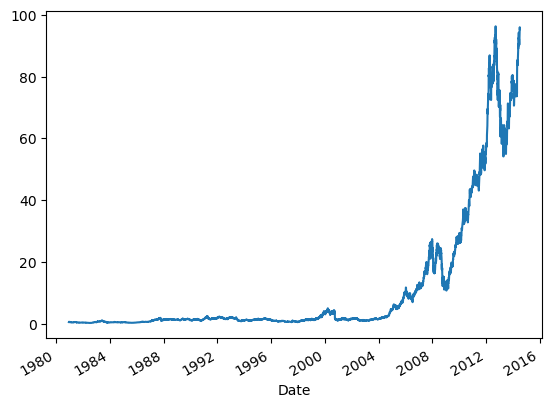

In [91]:
# pandas绘图
apple["Adj Close"].plot()
# apple["Close"].plot()

<Axes: xlabel='Date'>

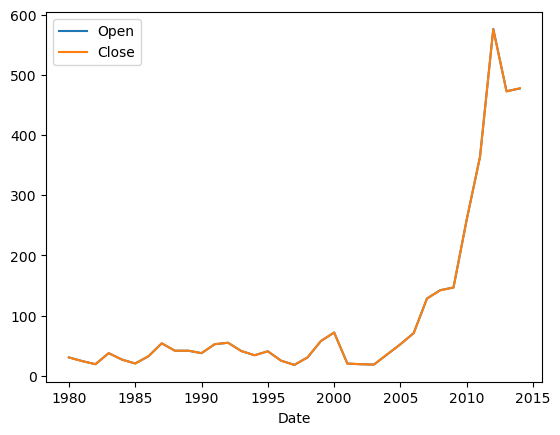

In [93]:
apple.groupby(by=apple.index.year)[["Open","Close"]].agg("mean").plot()

### 项目实例：点餐数据中的时间处理

In [94]:
# 读入数据合并
df1=pd.read_excel("data/meal_order_detail.xlsx",sheet_name=0)
df2=pd.read_excel("data/meal_order_detail.xlsx",sheet_name=1)
df3=pd.read_excel("data/meal_order_detail.xlsx",sheet_name=2)
df=pd.concat([df1,df2,df3],ignore_index=True)
df.head()
df.info()

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id
0,2956,417,610062,NaN,NaN,蒜蓉生蚝,0,1,49,NaN,2016-08-01 11:05:36,NaN,NaN,NaN,0,NaN,NaN,caipu/104001.jpg,1442
1,2958,417,609957,NaN,NaN,蒙古烤羊腿_x000D_\n_x000D_\n_x000D_\n,0,1,48,NaN,2016-08-01 11:07:07,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1442
2,2961,417,609950,NaN,NaN,大蒜苋菜,0,1,30,NaN,2016-08-01 11:07:40,NaN,NaN,NaN,0,NaN,NaN,caipu/303001.jpg,1442
3,2966,417,610038,NaN,NaN,芝麻烤紫菜,0,1,25,NaN,2016-08-01 11:11:11,NaN,NaN,NaN,0,NaN,NaN,caipu/105002.jpg,1442
4,2968,417,610003,NaN,NaN,蒜香包,0,1,13,NaN,2016-08-01 11:11:30,NaN,NaN,NaN,0,NaN,NaN,caipu/503002.jpg,1442


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   detail_id          10037 non-null  int64         
 1   order_id           10037 non-null  int64         
 2   dishes_id          10037 non-null  int64         
 3   logicprn_name      0 non-null      float64       
 4   parent_class_name  0 non-null      float64       
 5   dishes_name        10037 non-null  object        
 6   itemis_add         10037 non-null  int64         
 7   counts             10037 non-null  int64         
 8   amounts            10037 non-null  int64         
 9   cost               0 non-null      float64       
 10  place_order_time   10037 non-null  datetime64[ns]
 11  discount_amt       0 non-null      float64       
 12  discount_reason    0 non-null      float64       
 13  kick_back          0 non-null      float64       
 14  add_in

In [95]:
# 转换时间类型
df["place_order_time"]=pd.to_datetime(df["place_order_time"])

In [99]:
# 设置年月日字段
df["Year"]=df["place_order_time"].dt.year
df["Month"]=df["place_order_time"].dt.month
df["Day"]=df["place_order_time"].dt.day
df.head()

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,...,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id,Year,Month,Day
0,2956,417,610062,NaN,NaN,蒜蓉生蚝,0,1,49,NaN,...,NaN,NaN,0,NaN,NaN,caipu/104001.jpg,1442,2016,8,1
1,2958,417,609957,NaN,NaN,蒙古烤羊腿_x000D_\n_x000D_\n_x000D_\n,0,1,48,NaN,...,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1442,2016,8,1
2,2961,417,609950,NaN,NaN,大蒜苋菜,0,1,30,NaN,...,NaN,NaN,0,NaN,NaN,caipu/303001.jpg,1442,2016,8,1
3,2966,417,610038,NaN,NaN,芝麻烤紫菜,0,1,25,NaN,...,NaN,NaN,0,NaN,NaN,caipu/105002.jpg,1442,2016,8,1
4,2968,417,610003,NaN,NaN,蒜香包,0,1,13,NaN,...,NaN,NaN,0,NaN,NaN,caipu/503002.jpg,1442,2016,8,1


In [109]:
# 数据概况
df.groupby(by=["Day","order_id"])["detail_id"].count()
df.groupby(by=["Day","order_id"],as_index=False)["detail_id"].count()  #by不作为索引就只能作为列了

Day  order_id
1    301          6
     381          7
     392         24
     413         15
     415         10
                 ..
31   672         24
     692         10
     695         16
     721         15
     763          7
Name: detail_id, Length: 943, dtype: int64

,Day,order_id,detail_id
0,1,301,6
1,1,381,7
2,1,392,24
3,1,413,15
4,1,415,10
...,...,...,...
938,31,672,24
939,31,692,10
940,31,695,16
941,31,721,15


In [103]:
# 分组统计 每一天有多少订单
df.groupby(by="Day")["order_id"].count()  #错误的，或者说不符合题目的
df.groupby(by=["Year","Month","Day"])["order_id"].count()

Day
1     217
2     138
3     157
4     144
5     193
6     706
7     696
8     160
9     146
10    222
11    176
12    177
13    756
14    691
15    211
16    103
17    206
18    214
19    226
20    887
21    778
22    146
23    180
24    145
25    136
26    200
27    725
28    814
29    148
30    154
31    185
Name: order_id, dtype: int64

Year  Month  Day
2016  8      1      217
             2      138
             3      157
             4      144
             5      193
             6      706
             7      696
             8      160
             9      146
             10     222
             11     176
             12     177
             13     756
             14     691
             15     211
             16     103
             17     206
             18     214
             19     226
             20     887
             21     778
             22     146
             23     180
             24     145
             25     136
             26     200
             27     725
             28     814
             29     148
             30     154
             31     185
Name: order_id, dtype: int64

In [ ]:
# 分组统计


In [ ]:
# 讨论问题：如何求出每天有多少笔订单


## 4-7 Pandas绘图

In [4]:
# 准备工作
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
## 设置中文显示
plt.rcParams["font.sans-serif"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

In [3]:
#生成数据
import pandas as pd
dict = {"Name":["张三","李四","王五","赵六","钱七"],
       "Age":[18,25,30,21,19],
       "Sex":["男","女","女","男","女"],
        "Class":[1,1,2,2,1],
       "chn":[90,85,62,58,75],
       "math":[96,66,73,60,90]}
df = pd.DataFrame(dict)
df

,Name,Age,Sex,Class,chn,math
0,张三,18,男,1,90,96
1,李四,25,女,1,85,66
2,王五,30,女,2,62,73
3,赵六,21,男,2,58,60
4,钱七,19,女,1,75,90


<Axes: >

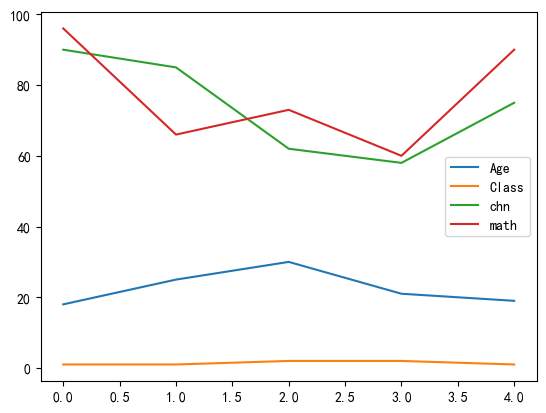

In [112]:
# 绘图
df.plot()

<Axes: title={'center': '语文数学成绩关系散点图'}, xlabel='chn', ylabel='math'>

Text(0.5, 0, '语文')

Text(0, 0.5, '数学')

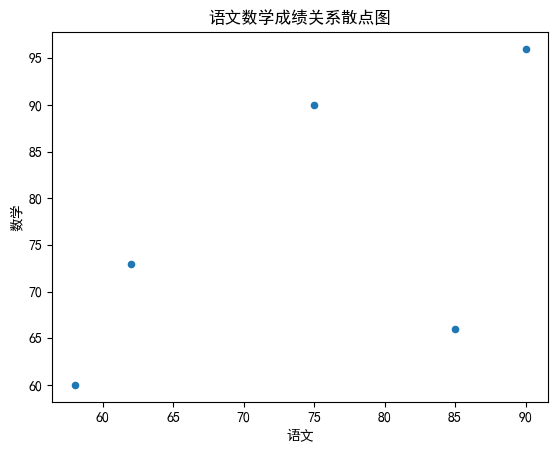

In [114]:
# 绘制语文和数学关系的散点图
df.plot(kind="scatter",x="chn",y="math",title="语文数学成绩关系散点图")
#pandas的绘图要和matplotlib结合使用，下面plt的使用
plt.xlabel("语文")
plt.ylabel("数学")
plt.show()

In [ ]:
# 设置参数（plt）


<Axes: >

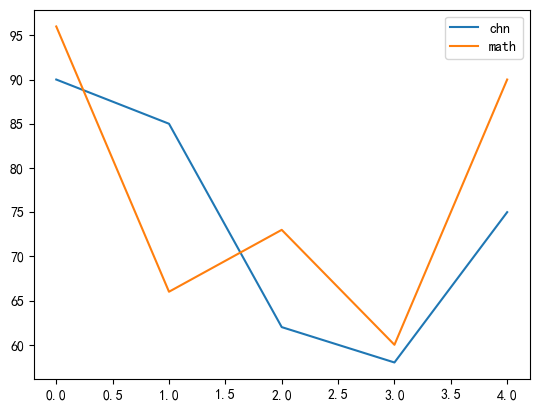

In [115]:
# 语文数学折线图
df.plot.line(y=["chn","math"])

<Axes: xlabel='Name'>

Text(0.5, 0, '姓名')

Text(0, 0.5, '成绩')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '张三'),
  Text(1, 0, '李四'),
  Text(2, 0, '王五'),
  Text(3, 0, '赵六'),
  Text(4, 0, '钱七')])

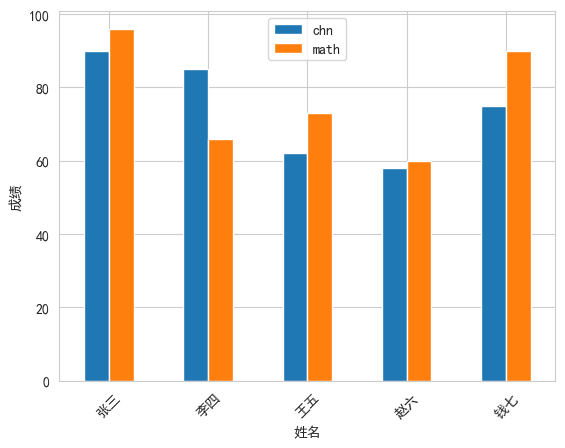

In [5]:
# 语文成绩条形图
df.plot.bar(x="Name",y=["chn","math"])
plt.xlabel("姓名");plt.ylabel("成绩")
plt.xticks(rotation=45)

<Axes: ylabel='Name'>

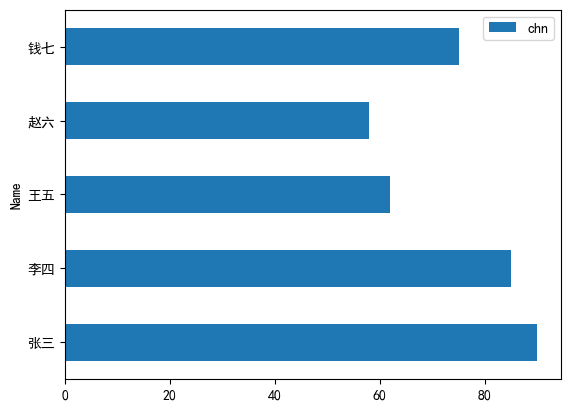

In [119]:
# 横向条形图
df.plot.barh(x="Name",y="chn")

<Figure size 600x600 with 0 Axes>

<Axes: >

<Axes: >

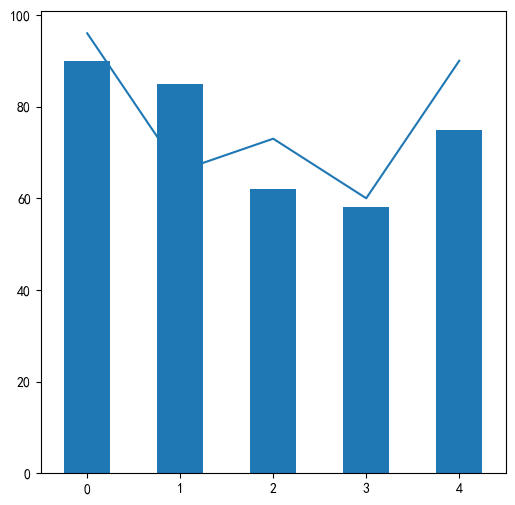

In [122]:
# Series绘图
plt.figure(figsize=(6,6))
df["chn"].plot.bar()
df['math'].plot.line()

In [ ]:
# 语文数学成绩条形图（并列）


<Axes: xlabel='Name'>

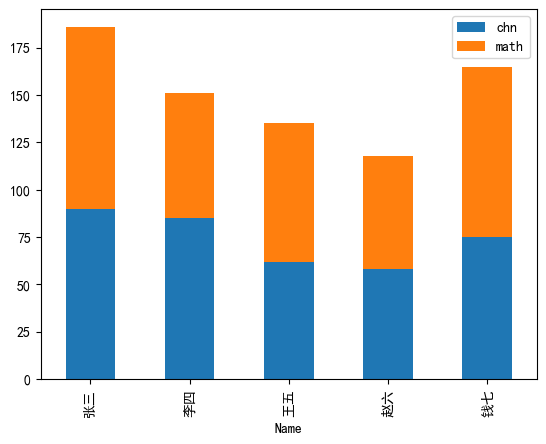

In [123]:
# 语文数学成绩条形图（堆叠）
df.plot.bar(x="Name",y=["chn","math"],stacked=True)

<Axes: >

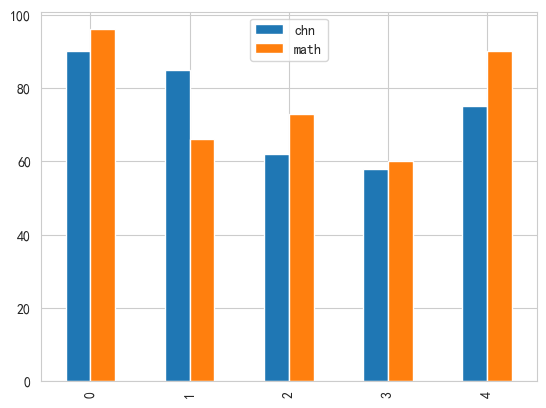

In [6]:
# 选取字段绘图
df[["chn","math"]].plot.bar()

<Axes: ylabel='Frequency'>

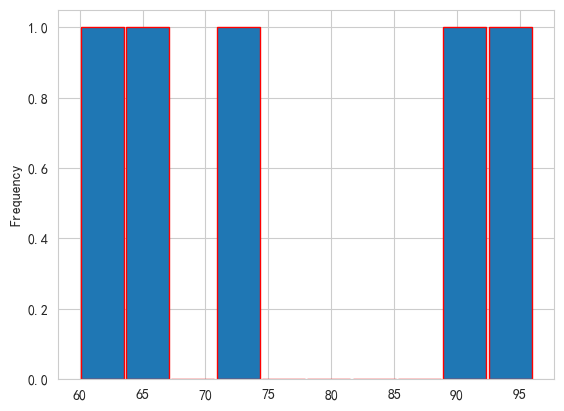

In [7]:
# 数学成绩直方图
df["math"].plot.hist(edgecolor="red",rwidth=0.95)

<Axes: >

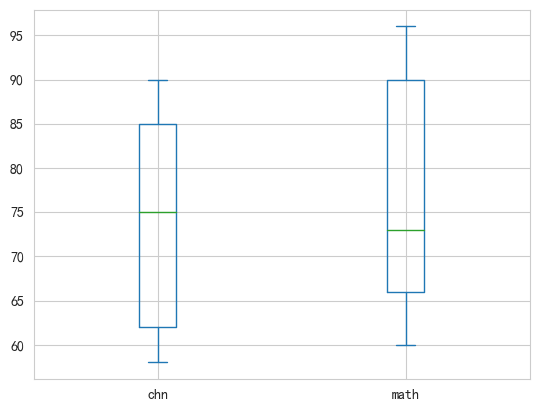

In [8]:
# 语文数学成绩的箱型图
df[["chn",'math']].plot.box()

In [ ]:
# 选取字段绘图


In [ ]:
# boxplot
df[['chn','math']].boxplot()

<Axes: >

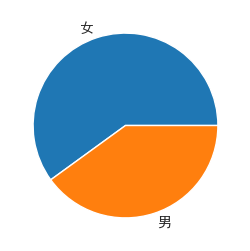

In [12]:
# 男女生人数饼图
df.groupby(by="Sex").size().plot.pie(figsize=(3,3))

In [ ]:
# kind形式


<Axes: title={'center': '语文数学成绩条形图'}, xlabel='Name'>

<Axes: >

<Axes: >

<Axes: xlabel='chn', ylabel='math'>

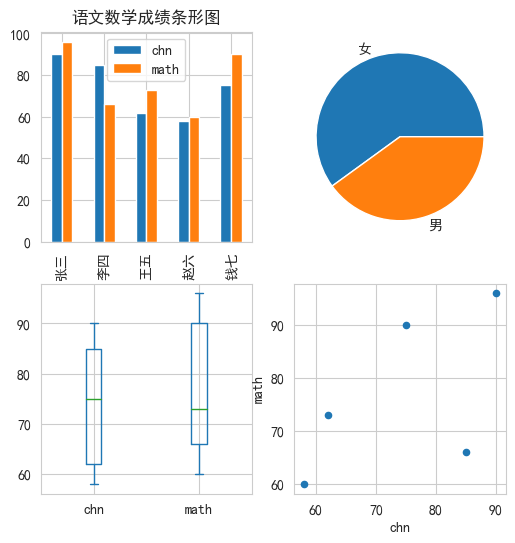

In [16]:
## Pandas快速画图绘图的子图，运用每个画图方法里的ax
fig,ax=plt.subplots(2,2,figsize=(6,6))
df.plot.bar(x="Name",y=["chn","math"],title="语文数学成绩条形图",ax=ax[0,0])
df.groupby(by="Sex").size().plot.pie(ax=ax[0,1])
df[["chn","math"]].plot.box(ax=ax[1,0])
df.plot.scatter(x="chn",y="math",ax=ax[1,1])

## 项目步骤：小费数据绘图分析

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# 准备工作
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
## 设置中文显示
plt.rcParams["font.sans-serif"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

In [17]:
# 小费数据集
tips=pd.read_csv("data/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='smoker'>

Text(0.5, 0, '是否吸烟')

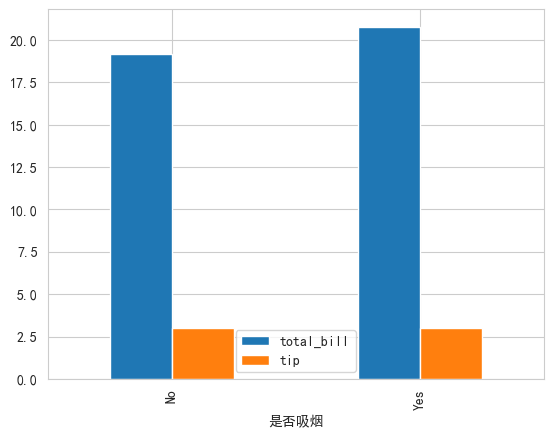

In [32]:
# 以是否吸烟分组，绘制账单和小费的均值条形图
tips.groupby(by="smoker")[["total_bill","tip"]].mean().plot.bar()
plt.xlabel("是否吸烟")

<Axes: >

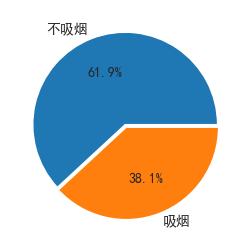

In [55]:
# 是否吸烟的人数对比的饼图
# tips.groupby(by="smoker").size().plot.pie(figsize=(3,3),autopct='%.1f%%')
tips.groupby(by="smoker").size().plot.pie(figsize=(3,3),autopct='%.1f%%',explode=[0.01,0.02],labels=["不吸烟","吸烟"])

In [ ]:
# 分组统计（smoker）
tips.groupby(by="smoker").size()
tips.groupby(by="smoker")["tip"].count()
tips["smoker"].value_counts()

In [ ]:
# 饼图（smoker）


In [ ]:
# 绘散点图：账单和小费的关系


In [ ]:
# kind方式

<Axes: xlabel='day'>

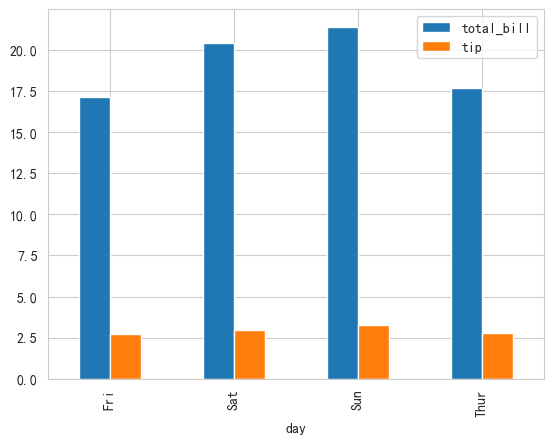

In [53]:
# 以tips数据为例，计算按就餐星期值分组的账单均值和小费均值并绘制条形图。以此来分析周末对就餐和小费的影响。
tips.groupby(by="day")[["total_bill","tip"]].mean().plot.bar()

In [ ]:
# 计算按就餐星期值和就餐时段分组的账单均值和小费均值并绘制条形图。


day   time  
Fri   Dinner     26
      Lunch      14
Sat   Dinner    219
Sun   Dinner    216
Thur  Dinner      2
      Lunch     150
Name: size, dtype: int64

<Axes: xlabel='day,time'>

<Axes: ylabel='size'>

Text(0.5, 0, '就餐时间')

(array([0. , 0.5, 1. ]),
 [Text(0.0, 0, '0.0'), Text(0.5, 0, '0.5'), Text(1.0, 0, '1.0')])

Text(0, 0.5, '就餐人数')

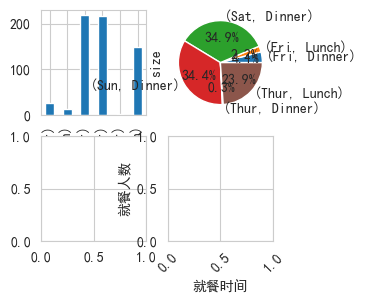

In [89]:
# 就餐人数和就餐时间的关系
fig,ax=plt.subplots(2,2,figsize=(6,6))
tips.groupby(by=["day","time"])["size"].sum()
tips.groupby(by=["day","time"])["size"].sum().plot.bar(ax=ax[0,0])
tips.groupby(by=["day","time"])["size"].sum().plot.pie(figsize=(3,3),autopct='%.1f%%',ax=ax[0,1])
plt.xlabel("就餐时间")
plt.xticks(rotation=45)
plt.ylabel("就餐人数")

In [ ]:
# 小费的分布状况的直方图


In [ ]:
# 账单直方图


In [ ]:
# 小费分布的箱型图


In [ ]:
# boxplot方式


In [ ]:
# seaborn箱型图


In [ ]:
#seaborn条形图


In [90]:
#扩展例子
df=pd.read_excel("data/PM25.xlsx")
df.head()
df.shape
df.info()

,月份,AQI,范围,质量等级,PM2.5,PM10,SO2,NO2,CO,O3
0,2013-12-01,103,21~173,轻度污染,77,109,19,51,1.433,87
1,2014-01-01,82,43~130,良,60,90,14,42,1.248,96
2,2014-02-01,47,20~66,优,31,45,7,30,1.157,63
3,2014-03-01,56,27~90,良,37,61,8,37,0.919,64
4,2014-04-01,52,29~71,良,32,53,8,34,0.920,81


(101, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   月份      101 non-null    datetime64[ns]
 1   AQI     101 non-null    int64         
 2   范围      101 non-null    object        
 3   质量等级    101 non-null    object        
 4   PM2.5   101 non-null    int64         
 5   PM10    101 non-null    int64         
 6   SO2     101 non-null    int64         
 7   NO2     101 non-null    int64         
 8   CO      101 non-null    float64       
 9   O3      101 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 8.0+ KB


In [93]:
df1=df.set_index("月份")
df1.head()

,AQI,范围,质量等级,PM2.5,PM10,SO2,NO2,CO,O3
月份,,,,,,,,,
2013-12-01,103,21~173,轻度污染,77,109,19,51,1.433,87
2014-01-01,82,43~130,良,60,90,14,42,1.248,96
2014-02-01,47,20~66,优,31,45,7,30,1.157,63
2014-03-01,56,27~90,良,37,61,8,37,0.919,64
2014-04-01,52,29~71,良,32,53,8,34,0.920,81


<Axes: xlabel='月份'>

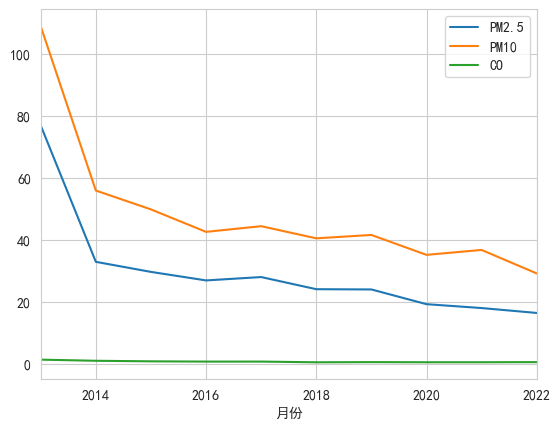

In [96]:
#重采样，这里表示一年一取
df1.resample("Y")["PM2.5","PM10","CO"].mean().plot.line()

,class,chn,math,eng,phy,chem,politics,bio,history,geo,pe,total,gender
num,,,,,,,,,,,,,
158,3,99.0,120,114.0,70.0,49.50,50.0,49.0,48.5,49.5,60,709.50,女
442,7,107.0,120,118.5,68.6,43.00,49.0,48.5,48.5,49.0,56,708.10,男
249,4,98.0,120,116.0,70.0,47.50,47.0,49.0,47.5,49.0,60,704.00,男
573,9,102.0,113,111.5,70.0,47.00,49.0,49.0,49.0,49.5,60,700.00,女
310,5,103.0,120,111.5,70.0,44.75,46.5,48.0,48.0,48.0,60,699.75,女


女    314
男    285
Name: gender, dtype: int64

Text(0.5,1,'男女比例饼图')

Text(0,0.5,'')

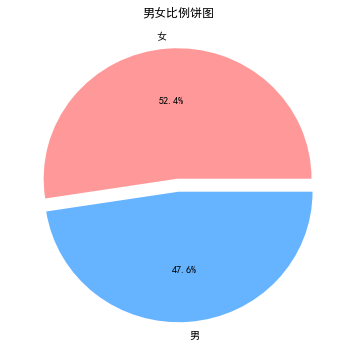

,chn,math
class,,
1,82.983871,92.822581
2,81.577586,93.172414
3,82.620690,88.586207
4,83.109375,97.296875
5,84.741071,97.892857
6,83.144068,92.406780
7,83.017241,90.293103
8,83.658333,98.650000
9,83.209677,94.354839


Text(0.5,1,'班级的语文和数学平均分')

Text(0.5,0,'班级')

Text(0,0.5,'平均分数')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

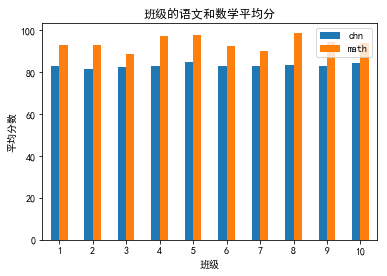

In [59]:
# 读取学生成绩数据，以num列为行索引，进行如下操作：
# 1、按每个问题的要求显示结果和绘图；
# 2、绘图优先采用Pandas绘图功能，可以使用matplotlib库进行参数设置；可以采用matplotlib或seaborn完成其他解法；
# 3、截图上传代码和结果，清晰美观；
# 4、鼓励列出尽可能多的解决方法。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.sans-serif"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False
# 读取数据
stu = pd.read_csv("data/scores.csv", index_col="num", encoding="gbk")
stu.head()

# （1）按性别分组计算男女各有多少人，并绘制相应饼图
plt.figure(figsize=(6, 6))
stu['gender'].value_counts()
stu['gender'].value_counts().plot.pie(autopct="%.1f%%", explode=[0.05, 0.05], colors=['#ff9999','#66b3ff'])
plt.title('男女比例饼图')
plt.ylabel('');plt.show()

# （2）按班级分组计算语文和数学的平均分，并绘制相应的并列条形图
plt.figure(figsize=(10, 6))
stu.groupby('class')[['chn', 'math']].mean()
stu.groupby('class')[['chn', 'math']].mean().plot.bar()
plt.title('班级的语文和数学平均分')
plt.xlabel('班级');plt.ylabel('平均分数');plt.xticks(rotation=0);plt.show()

Text(0.5,1,'各班语文成绩箱型图')

Text(0.5,0.98,'')

Text(0.5,0,'班级')

Text(0,0.5,'语文成绩')

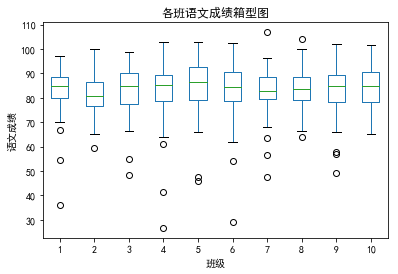

Text(0.5,1,'各班英语成绩箱型图')

Text(0.5,0.98,'')

Text(0.5,0,'班级')

Text(0,0.5,'英语成绩')

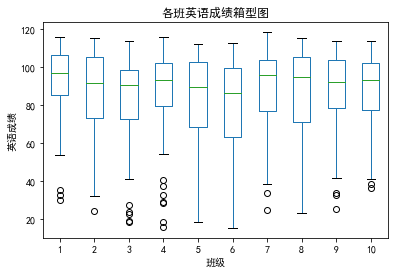

In [64]:
# （3）按班级分组绘制语文和英语成绩的箱型图（两个图，每个图有十个班各自的箱型图）
plt.figure(figsize=(12, 6))
stu.boxplot(column='chn', by='class', grid=False)
plt.title('各班语文成绩箱型图')
plt.suptitle('')
plt.xlabel('班级')
plt.ylabel('语文成绩')
plt.show()

plt.figure(figsize=(12, 6))
stu.boxplot(column='eng', by='class', grid=False)
plt.title('各班英语成绩箱型图')
plt.suptitle('')
plt.xlabel('班级')
plt.ylabel('英语成绩')
plt.show()

Text(0.5,1,'数学与物理成绩散点图')

Text(0.5,0,'数学成绩')

Text(0,0.5,'物理成绩')

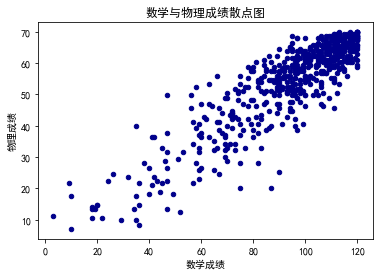

In [61]:
# （4）绘制数学和物理成绩的散点图
plt.figure(figsize=(8, 6))
stu.plot.scatter(x='math', y='phy', c='DarkBlue')
plt.title('数学与物理成绩散点图')
plt.xlabel('数学成绩')
plt.ylabel('物理成绩')
plt.show()

In [62]:
# （5）利用交叉表求出每个班男女各有多少人以及每个班男女各自的总分平均分
pd.crosstab(index=stu['class'], columns=stu['gender'], values=stu['total'], aggfunc=[np.count_nonzero,np.mean])
# pd.crosstab(index=stu['class'], columns=stu['gender'], values=stu['total'], aggfunc="count")
# pd.crosstab(index=stu['class'], columns=stu['gender'], values=stu['total'], aggfunc="mean")

# （6）利用透视表求出按班级和性别分组的语文和数学成绩各自的总分和平均分
stu.pivot_table(values=['chn', 'math'], index=['class', 'gender'], aggfunc={'chn': ['sum', 'mean'], 'math': ['sum', 'mean']})

count_nonzero              mean            
gender             女     男           女           男
class                                             
1               32.0  30.0  577.635937  579.898333
2               29.0  29.0  568.074138  573.620690
3               27.0  31.0  530.688889  574.682258
4               34.0  30.0  582.498529  565.501667
5               22.0  34.0  572.752273  579.229412
6               32.0  27.0  549.595312  555.940741
7               30.0  28.0  555.551667  576.412500
8               37.0  23.0  573.954054  592.406522
9               35.0  27.0  555.780000  595.305556
10              36.0  26.0  576.063889  573.082692

chn                math      
                   mean     sum        mean   sum
class gender                                     
1     女       82.328125  2634.5   93.218750  2983
      男       83.683333  2510.5   92.400000  2772
2     女       81.844828  2373.5   92.379310  2679
      男       81.310345  2358.0   93.965517  2725
3     女       82.111111  2217.0   82.333333  2223
      男       83.064516  2575.0   94.032258  2915
4     女       84.955882  2888.5   97.117647  3302
      男       81.016667  2430.5   97.500000  2925
5     女       83.068182  1827.5   96.227273  2117
      男       85.823529  2918.0   98.970588  3365
6     女       82.687500  2646.0   93.031250  2977
      男       83.685185  2259.5   91.666667  2475
7     女       82.716667  2481.5   89.500000  2685
      男       83.339286  2333.5   91.142857  2552
8     女       83.067568  3073.5   97.297297  3600
      男       84.608696  1946.0  100.826087  2319
9     女       80.700000  2824.5   90.514286  3168
      男       86.462963  2334.5   99.333333  2682
10    女       85.486111  3077.5   94.500000  3402
      男       82.750000  2151.5   93.500000  2431

,class,chn,math,eng,phy,chem,politics,bio,history,geo,pe,total,gender
num,,,,,,,,,,,,,
158,3,99.0,120,114.0,70.0,49.50,50.0,49.0,48.5,49.5,60,709.50,女
442,7,107.0,120,118.5,68.6,43.00,49.0,48.5,48.5,49.0,56,708.10,男
249,4,98.0,120,116.0,70.0,47.50,47.0,49.0,47.5,49.0,60,704.00,男
573,9,102.0,113,111.5,70.0,47.00,49.0,49.0,49.0,49.5,60,700.00,女
310,5,103.0,120,111.5,70.0,44.75,46.5,48.0,48.0,48.0,60,699.75,女


gender
女    314
男    285
dtype: int64

Text(0.5,1,'性别比例饼图')

,chn,math
class,,
1,82.983871,92.822581
2,81.577586,93.172414
3,82.620690,88.586207
4,83.109375,97.296875
5,84.741071,97.892857
6,83.144068,92.406780
7,83.017241,90.293103
8,83.658333,98.650000
9,83.209677,94.354839


Text(0.5,1,'班级语文和数学平均分')

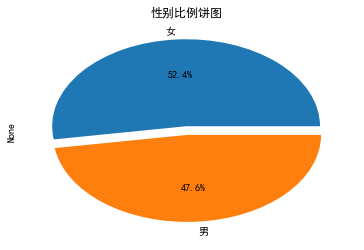

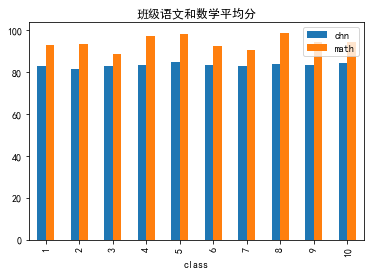

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.sans-serif"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False
# 读取学生成绩数据，以num列为行索引，进行如下操作：
# 1、按每个问题的要求显示结果和绘图；
# 2、绘图优先采用Pandas绘图功能，可以使用matplotlib库进行参数设置；可以采用matplotlib或seaborn完成其他解法；
# 3、截图上传代码和结果，清晰美观；
# 4、鼓励列出尽可能多的解决方法。
stu=pd.read_csv("data/scores.csv",index_col="num",encoding="gbk")
stu.head()
plt.figsize=(10,8)
# fig,ax=plt.subplots(1,2,figsize=(10,8),sharex=True)
# （1）按性别分组计算男女各有多少人，并绘制相应饼图；
# stu['gender'].value_counts()
stu.groupby(by="gender").size()
# stu['gender'].value_counts().plot.pie(autopct="%.1f%%",explode=[0.05,0.05])
stu.groupby(by="gender").size().plot.pie(autopct="%.1f%%",explode=[0.05,0.05])
plt.title('性别比例饼图')
# plt.ylabel("")
# （2）按班级分组计算语文和数学的平均分，并绘制相应的并列条形图；
stu.groupby(by="class")["chn","math"].mean()
stu.groupby(by="class")["chn","math"].mean().plot.bar()
plt.title('班级语文和数学平均分')
# plt.xlabel('班级')
# plt.ylabel('平均分数')

,math,phy
num,,
158,120,70.0
442,120,68.6
249,120,70.0
573,113,70.0
310,120,70.0
613,120,70.0
502,120,68.6
115,117,70.0
298,120,64.4


Text(0.5,1,'数学与物理成绩散点图')

gender,女,男
class,,
1,32,30
2,29,29
3,27,31
4,34,30
5,22,34
6,32,27
7,30,28
8,37,23
9,35,27


gender,女,男
class,,
1,577.635937,579.898333
2,568.074138,573.620690
3,530.688889,574.682258
4,582.498529,565.501667
5,572.752273,579.229412
6,549.595312,555.940741
7,555.551667,576.412500
8,573.954054,592.406522
9,555.780000,595.305556


sum             mean            
                 chn  math        chn        math
class gender                                     
1     女       2634.5  2983  82.328125   93.218750
      男       2510.5  2772  83.683333   92.400000
2     女       2373.5  2679  81.844828   92.379310
      男       2358.0  2725  81.310345   93.965517
3     女       2217.0  2223  82.111111   82.333333
      男       2575.0  2915  83.064516   94.032258
4     女       2888.5  3302  84.955882   97.117647
      男       2430.5  2925  81.016667   97.500000
5     女       1827.5  2117  83.068182   96.227273
      男       2918.0  3365  85.823529   98.970588
6     女       2646.0  2977  82.687500   93.031250
      男       2259.5  2475  83.685185   91.666667
7     女       2481.5  2685  82.716667   89.500000
      男       2333.5  2552  83.339286   91.142857
8     女       3073.5  3600  83.067568   97.297297
      男       1946.0  2319  84.608696  100.826087
9     女       2824.5  3168  80.700000   90.514286
      男       2334.5  2682  86.462963   99.333333
10    女       3077.5  3402  85.486111   94.500000
      男       2151.5  2431  82.750000   93.500000

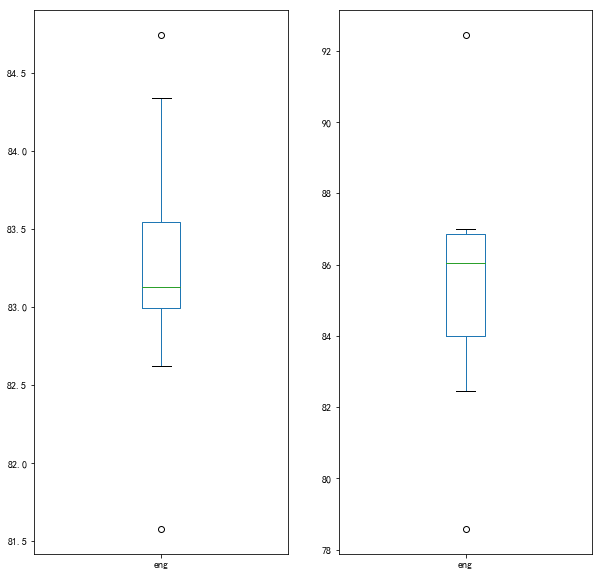

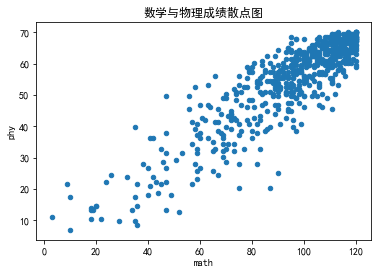

In [10]:
# （3）按班级分组绘制语文和英语成绩的箱型图（两个图， 每个图有十个班各自的箱型图）；
fig,ax=plt.subplots(1,2,figsize=(10,10),sharex=True)
# stu.groupby(by="class")["chn","eng"].mean()
stu.groupby(by="class")["chn"].mean().plot.box(ax=ax[0])
ax[0].set_xlabel=("语文成绩")
stu.groupby(by="class")["eng"].mean().plot.box(ax=ax[1])
# （4）绘制数学和物理成绩的散点图；
stu[["math","phy"]]
stu.plot(kind="scatter",x="math",y="phy")
# sns.scatterplot(x='math', y='phy', data=stu, hue='gender', style='gender', s=100)
plt.title('数学与物理成绩散点图')
# plt.xlabel('数学')
# plt.ylabel('物理')
# （5）利用交叉表求出每个班男女各有多少人以及每个班男女各自的总分平均分；
pd.crosstab(index=stu["class"],columns=stu['gender'],values=stu["math"],aggfunc="count")
pd.crosstab(index=stu["class"],columns=stu['gender'],values=stu["total"],aggfunc="mean")
# stu['total'] = stu[['chn', 'math', 'eng', 'phy', 'chem', 'politics', 'bio', 'history', 'geo', 'pe']].sum(axis=1)
# gender_class_crosstab = pd.crosstab(index=stu['class'], columns=stu['gender'], values=stu['total'], aggfunc=['count', np.mean])
# （6）利用透视表求出按班级和性别分组的语文和数学成绩各自的总分和平均分。
# pd.pivot_table(stu,index=["class"],columns=["gender"],values=["chn","math"],aggfunc="sum")
# pd.pivot_table(stu,index=["class"],columns=["gender"],values=["chn","math"],aggfunc="mean")
stu.pivot_table(values=['chn', 'math'], index=['class', 'gender'], aggfunc=[np.sum, np.mean])